Load data and libraries

In [ ]:
# Upload the local data file to colab
from google.colab import files
uploaded = files.upload()

In [ ]:
# Installation of necessary libraries
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install geneview
!pip install gprofiler-official
!pip install statsmodels
!pip install scikit-learn
!pip install lifelines
!pip install gseapy
!pip install scikit-learn==1.5.2
!pip install matplotlib seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for geneview: filename=geneview-0.2.1-py3-none-any.whl size=54470 sha256=21d1de93ed61221ed5d5e0253858419c0aeea3626c348cc4230984fb9fdc52e3
  Stored in directory: /root/.cache/pip/wheels/91/cb/65/81dafd0254adb97b0938e9c3da9c2c74a8e6169e4595437ca7
Successfully built geneview
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 kB 6.2 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=583d0b3b8b545b3925b68c39d3f9b6738064c5e774eee47446f32765666dfc7f
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 552.9/552.9 kB 7.9 MB/s eta 0:00:00


In [ ]:
# import libraries to use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geneview
from gprofiler import GProfiler
import statsmodels.api as sm
from sklearn import datasets, model_selection, metrics
import math
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Read the data in the glioma_mskcc_2019_clinical_data_simpler.csv file into a dataframe

data_mutations_short = pd.read_csv('data_mutations_short.csv', sep=",")
clinical_data = pd.read_csv('lgggbm_tcga_pub_clinical_data_short.csv', sep=",")

In [ ]:
# show df
data_mutations_short

,Hugo_Symbol,Variant_Classification,Tumor_Sample_Barcode
0,AKAP6,Missense_Mutation,TCGA-02-0003
1,ANAPC4,Missense_Mutation,TCGA-02-0003
2,AUTS2,Missense_Mutation,TCGA-02-0003
3,ABTB3,Missense_Mutation,TCGA-02-0003
4,CLEC3B,Silent,TCGA-02-0003
...,...,...,...
30724,FLNC,Frame_Shift_Del,TCGA-WY-A85E
30725,MT-ND5,Silent,TCGA-CS-4943
30726,MT-CO1,Silent,TCGA-DH-5141
30727,MT-CO1,Missense_Mutation,TCGA-CS-4943


In [ ]:
# show df
clinical_data

,Patient ID,Sample ID,Absolute Extract Ploidy,Diagnosis Age,ATRX status,BCR Status,BRAF-KIAA1549 fusion,BRAF V600E status,Cancer Type,Cancer Type Detailed,...,Percent aneuploidy,Sex,Study,Telomere length estimate in blood normal (Kb),Telomere length estimate in tumor (Kb),Telomere Maintenance,TERT expression (log2),TERT expression status,TERT promoter status,TMB (nonsynonymous)
0,TCGA-02-0001,TCGA-02-0001-01,3.47,44,NaN,IGC,NaN,NaN,Glioma,Diffuse Glioma,...,0.424900,Female,Glioblastoma multiforme,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,TCGA-02-0003,TCGA-02-0003-01,1.96,50,WT,IGC,NaN,WT,Glioma,Diffuse Glioma,...,0.147988,Male,Glioblastoma multiforme,NaN,NaN,NaN,NaN,NaN,NaN,1.366667
2,TCGA-02-0004,TCGA-02-0004-01,NaN,59,NaN,IGC,NaN,NaN,Glioma,Diffuse Glioma,...,0.117881,Male,Glioblastoma multiforme,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,TCGA-02-0006,TCGA-02-0006-01,1.93,56,NaN,IGC,NaN,NaN,Glioma,Diffuse Glioma,...,0.239055,Female,Glioblastoma multiforme,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,TCGA-02-0007,TCGA-02-0007-01,1.89,40,NaN,IGC,NaN,NaN,Glioma,Diffuse Glioma,...,0.257454,Female,Glioblastoma multiforme,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1042,TCGA-VW-A7QS,TCGA-VW-A7QS-01,1.95,35,WT,NCH,WT,WT,Glioma,Diffuse Glioma,...,0.086236,Female,Brain Lower Grade Glioma,NaN,NaN,NaN,4.754888,Expressed,NaN,0.933333
1043,TCGA-VW-A8FI,TCGA-VW-A8FI-01,NaN,66,WT,NCH,WT,WT,Glioma,Diffuse Glioma,...,0.107533,Male,Brain Lower Grade Glioma,NaN,NaN,NaN,6.643856,Expressed,NaN,1.233333
1044,TCGA-W9-A837,TCGA-W9-A837-01,NaN,47,WT,NCH,WT,WT,Glioma,Diffuse Glioma,...,0.062593,Male,Brain Lower Grade Glioma,NaN,NaN,NaN,3.169925,Expressed,NaN,0.600000
1045,TCGA-WH-A86K,TCGA-WH-A86K-01,NaN,65,WT,NCH,WT,WT,Glioma,Diffuse Glioma,...,0.161448,Male,Brain Lower Grade Glioma,NaN,NaN,NaN,0.000000,Not expressed,NaN,0.933333


In [ ]:
import pandas as pd


# Step 1: Standardize formatting by stripping whitespace and converting to uppercase
data_mutations_short['Tumor_Sample_Barcode'] = data_mutations_short['Tumor_Sample_Barcode'].str.strip().str.upper()
clinical_data['Sample ID'] = clinical_data['Sample ID'].str.strip().str.upper()
clinical_data['Patient ID'] = clinical_data['Patient ID'].str.strip().str.upper()



In [ ]:
clinical_data

,Patient ID,Sample ID,Absolute Extract Ploidy,Diagnosis Age,ATRX status,BCR Status,BRAF-KIAA1549 fusion,BRAF V600E status,Cancer Type,Cancer Type Detailed,...,Percent aneuploidy,Sex,Study,Telomere length estimate in blood normal (Kb),Telomere length estimate in tumor (Kb),Telomere Maintenance,TERT expression (log2),TERT expression status,TERT promoter status,TMB (nonsynonymous)
0,TCGA-02-0001,TCGA-02-0001-01,3.47,44,NaN,IGC,NaN,NaN,Glioma,Diffuse Glioma,...,0.424900,Female,Glioblastoma multiforme,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,TCGA-02-0003,TCGA-02-0003-01,1.96,50,WT,IGC,NaN,WT,Glioma,Diffuse Glioma,...,0.147988,Male,Glioblastoma multiforme,NaN,NaN,NaN,NaN,NaN,NaN,1.366667
2,TCGA-02-0004,TCGA-02-0004-01,NaN,59,NaN,IGC,NaN,NaN,Glioma,Diffuse Glioma,...,0.117881,Male,Glioblastoma multiforme,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,TCGA-02-0006,TCGA-02-0006-01,1.93,56,NaN,IGC,NaN,NaN,Glioma,Diffuse Glioma,...,0.239055,Female,Glioblastoma multiforme,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,TCGA-02-0007,TCGA-02-0007-01,1.89,40,NaN,IGC,NaN,NaN,Glioma,Diffuse Glioma,...,0.257454,Female,Glioblastoma multiforme,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1042,TCGA-VW-A7QS,TCGA-VW-A7QS-01,1.95,35,WT,NCH,WT,WT,Glioma,Diffuse Glioma,...,0.086236,Female,Brain Lower Grade Glioma,NaN,NaN,NaN,4.754888,Expressed,NaN,0.933333
1043,TCGA-VW-A8FI,TCGA-VW-A8FI-01,NaN,66,WT,NCH,WT,WT,Glioma,Diffuse Glioma,...,0.107533,Male,Brain Lower Grade Glioma,NaN,NaN,NaN,6.643856,Expressed,NaN,1.233333
1044,TCGA-W9-A837,TCGA-W9-A837-01,NaN,47,WT,NCH,WT,WT,Glioma,Diffuse Glioma,...,0.062593,Male,Brain Lower Grade Glioma,NaN,NaN,NaN,3.169925,Expressed,NaN,0.600000
1045,TCGA-WH-A86K,TCGA-WH-A86K-01,NaN,65,WT,NCH,WT,WT,Glioma,Diffuse Glioma,...,0.161448,Male,Brain Lower Grade Glioma,NaN,NaN,NaN,0.000000,Not expressed,NaN,0.933333


Total Patient Count: 1047

Sex Distribution:
Sex
Male      618
Female    429
Name: count, dtype: int64


<ipython-input-16-3af73f009409>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sex_distribution.index, y=sex_distribution.values, palette='pastel')


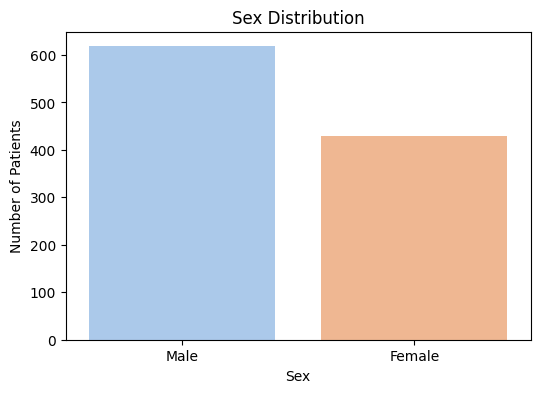

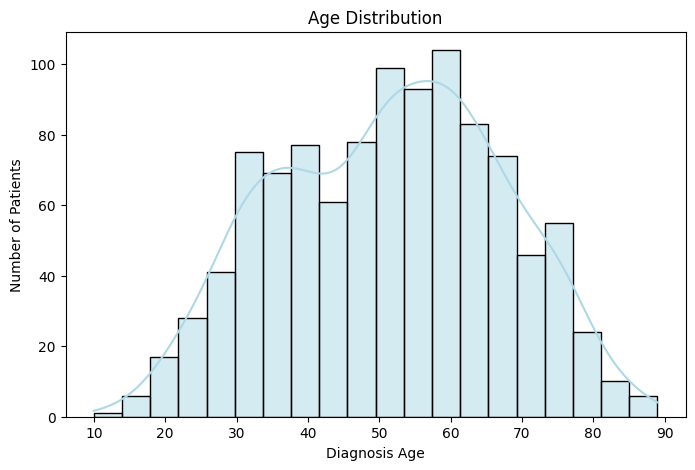


Neoplasm Histologic Type Distribution:
Neoplasm Histologic Type Name
glioblastoma         590
oligodendroglioma    174
astrocytoma          169
oligoastrocytoma     114
Name: count, dtype: int64


<ipython-input-16-3af73f009409>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=histologic_type_distribution.index, y=histologic_type_distribution.values, palette='muted')


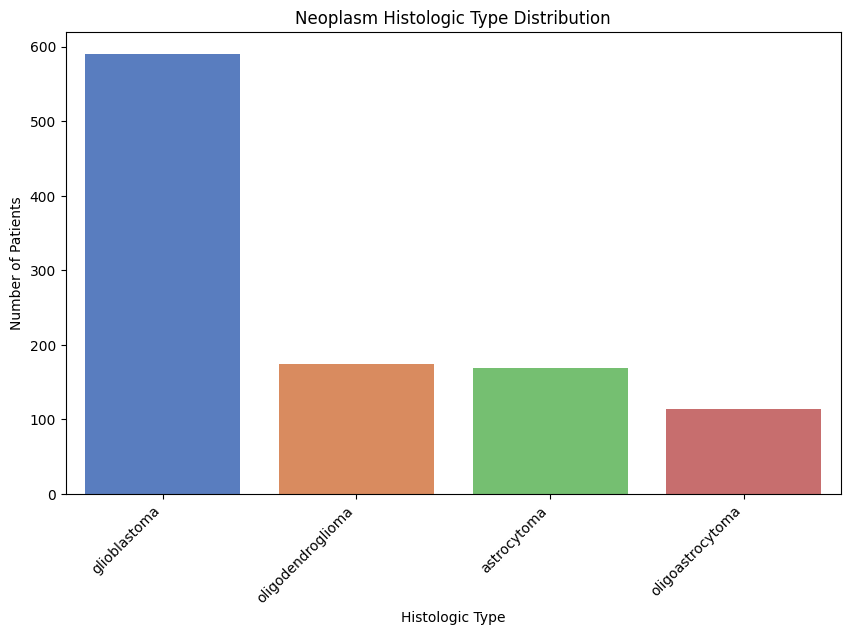


Neoplasm Histologic Grade Distribution:
Neoplasm Histologic Grade
G4    590
G3    241
G2    216
Name: count, dtype: int64


<ipython-input-16-3af73f009409>:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=histologic_grade_distribution.index, y=histologic_grade_distribution.values, palette='deep')


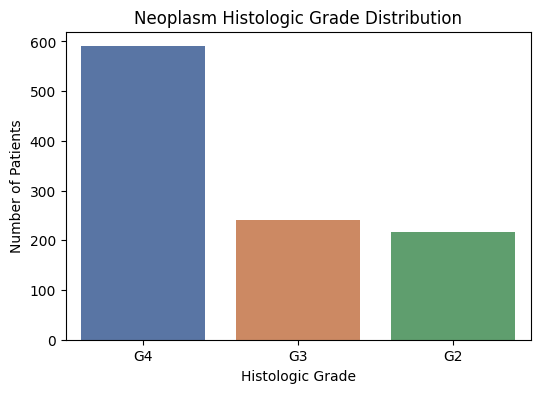

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Display total patient count
total_patients = clinical_data['Patient ID'].nunique()
print(f"Total Patient Count: {total_patients}")

# Plot and display Sex distribution
sex_distribution = clinical_data['Sex'].value_counts()
print("\nSex Distribution:")
print(sex_distribution)

plt.figure(figsize=(6, 4))
sns.barplot(x=sex_distribution.index, y=sex_distribution.values, palette='pastel')
plt.title('Sex Distribution')
plt.xlabel('Sex')
plt.ylabel('Number of Patients')
plt.show()

# Plot and display Age distribution
plt.figure(figsize=(8, 5))
sns.histplot(clinical_data['Diagnosis Age'], bins=20, kde=True, color='lightblue')
plt.title('Age Distribution')
plt.xlabel('Diagnosis Age')
plt.ylabel('Number of Patients')
plt.show()

# Display Neoplasm Histologic Type distribution
histologic_type_distribution = clinical_data['Neoplasm Histologic Type Name'].value_counts()
print("\nNeoplasm Histologic Type Distribution:")
print(histologic_type_distribution)

plt.figure(figsize=(10, 6))
sns.barplot(x=histologic_type_distribution.index, y=histologic_type_distribution.values, palette='muted')
plt.xticks(rotation=45, ha='right')
plt.title('Neoplasm Histologic Type Distribution')
plt.xlabel('Histologic Type')
plt.ylabel('Number of Patients')
plt.show()

# Display Neoplasm Histologic Grade distribution
histologic_grade_distribution = clinical_data['Neoplasm Histologic Grade'].value_counts()
print("\nNeoplasm Histologic Grade Distribution:")
print(histologic_grade_distribution)

plt.figure(figsize=(6, 4))
sns.barplot(x=histologic_grade_distribution.index, y=histologic_grade_distribution.values, palette='deep')
plt.title('Neoplasm Histologic Grade Distribution')
plt.xlabel('Histologic Grade')
plt.ylabel('Number of Patients')
plt.show()


In [ ]:
# Step 1: Perform the merging steps to create the intermediate columns
merged_df = pd.merge(data_mutations_short, clinical_data[['Patient ID', 'Sample ID']],
                     left_on='Tumor_Sample_Barcode', right_on='Sample ID', how='left')

merged_df = pd.merge(merged_df, clinical_data[['Patient ID', 'Sample ID']],
                     left_on='Tumor_Sample_Barcode', right_on='Patient ID', how='left',
                     suffixes=('_from_sample', '_from_patient'))

# Step 2: Place this code here to finalize columns, rename, and calculate row counts

# Save the initial row count before dropping NaN values
initial_row_count = merged_df.shape[0]

# Finalize Patient ID and Sample ID columns based on available matches
merged_df['Patient ID'] = merged_df['Patient ID_from_sample'].combine_first(merged_df['Patient ID_from_patient'])
merged_df['Sample ID'] = merged_df['Sample ID_from_sample'].combine_first(merged_df['Sample ID_from_patient'])

# Drop rows with NaN values in the final Patient ID and Sample ID columns
merged_df = merged_df.dropna(subset=['Patient ID', 'Sample ID'])

# Save the row count after dropping NaN values
final_row_count = merged_df.shape[0]

# Drop intermediate columns used for matching
merged_df = merged_df.drop(columns=['Patient ID_from_sample', 'Patient ID_from_patient',
                                    'Sample ID_from_sample', 'Sample ID_from_patient'])

# Display the result for verification
print(f"Initial row count before dropping NaN: {initial_row_count}")
print(f"Final row count after dropping NaN: {final_row_count}")

print("Columns in the merged DataFrame:")
print(merged_df.columns)
print("First few rows of the merged DataFrame:")
print(merged_df.head())


Initial row count before dropping NaN: 30729
Final row count after dropping NaN: 28613
Columns in the merged DataFrame:
Index(['Hugo_Symbol', 'Variant_Classification', 'Tumor_Sample_Barcode',
       'Patient ID', 'Sample ID'],
      dtype='object')
First few rows of the merged DataFrame:
  Hugo_Symbol Variant_Classification Tumor_Sample_Barcode    Patient ID  \
0       AKAP6      Missense_Mutation         TCGA-02-0003  TCGA-02-0003   
1      ANAPC4      Missense_Mutation         TCGA-02-0003  TCGA-02-0003   
2       AUTS2      Missense_Mutation         TCGA-02-0003  TCGA-02-0003   
3       ABTB3      Missense_Mutation         TCGA-02-0003  TCGA-02-0003   
4      CLEC3B                 Silent         TCGA-02-0003  TCGA-02-0003   

         Sample ID  
0  TCGA-02-0003-01  
1  TCGA-02-0003-01  
2  TCGA-02-0003-01  
3  TCGA-02-0003-01  
4  TCGA-02-0003-01  


In [ ]:
mutations_merged_df =merged_df

In [ ]:
mutations_merged_df

,Hugo_Symbol,Variant_Classification,Tumor_Sample_Barcode,Patient ID,Sample ID
0,AKAP6,Missense_Mutation,TCGA-02-0003,TCGA-02-0003,TCGA-02-0003-01
1,ANAPC4,Missense_Mutation,TCGA-02-0003,TCGA-02-0003,TCGA-02-0003-01
2,AUTS2,Missense_Mutation,TCGA-02-0003,TCGA-02-0003,TCGA-02-0003-01
3,ABTB3,Missense_Mutation,TCGA-02-0003,TCGA-02-0003,TCGA-02-0003-01
4,CLEC3B,Silent,TCGA-02-0003,TCGA-02-0003,TCGA-02-0003-01
...,...,...,...,...,...
30559,ATRX,Frame_Shift_Del,TCGA-WY-A858,TCGA-WY-A858,TCGA-WY-A858-01
30725,MT-ND5,Silent,TCGA-CS-4943,TCGA-CS-4943,TCGA-CS-4943-01
30726,MT-CO1,Silent,TCGA-DH-5141,TCGA-DH-5141,TCGA-DH-5141-01
30727,MT-CO1,Missense_Mutation,TCGA-CS-4943,TCGA-CS-4943,TCGA-CS-4943-01


In [ ]:
mutations_merged_df.columns

Index(['Hugo_Symbol', 'Variant_Classification', 'Tumor_Sample_Barcode',
       'Patient ID', 'Sample ID'],
      dtype='object')

In [ ]:
# Row count before filtering
initial_row_count = mutations_merged_df.shape[0]

# Filter out rows where Variant_Classification is 'Silent'
mutations_merged_df = mutations_merged_df[mutations_merged_df['Variant_Classification'] != 'Silent']

# Row count after filtering
final_row_count = mutations_merged_df.shape[0]

# Calculate the number of rows removed (those with 'Silent' in Variant_Classification)
silent_count = initial_row_count - final_row_count

# Display the results
print(f"Initial row count: {initial_row_count}")
print(f"Number of rows with 'Silent' in Variant_Classification removed: {silent_count}")
print(f"Row count after dropping 'Silent' rows: {final_row_count}")

# Display the updated DataFrame for verification
print("Updated mutations_merged_df:")
print(mutations_merged_df.head())


Initial row count: 21729
Number of rows with 'Silent' in Variant_Classification removed: 0
Row count after dropping 'Silent' rows: 21729
Updated mutations_merged_df:
  Hugo_Symbol Variant_Classification Tumor_Sample_Barcode    Patient ID  \
0       AKAP6      Missense_Mutation         TCGA-02-0003  TCGA-02-0003   
1      ANAPC4      Missense_Mutation         TCGA-02-0003  TCGA-02-0003   
2       AUTS2      Missense_Mutation         TCGA-02-0003  TCGA-02-0003   
3       ABTB3      Missense_Mutation         TCGA-02-0003  TCGA-02-0003   
7      DZIP1L      Missense_Mutation         TCGA-02-0003  TCGA-02-0003   

         Sample ID  
0  TCGA-02-0003-01  
1  TCGA-02-0003-01  
2  TCGA-02-0003-01  
3  TCGA-02-0003-01  
7  TCGA-02-0003-01  


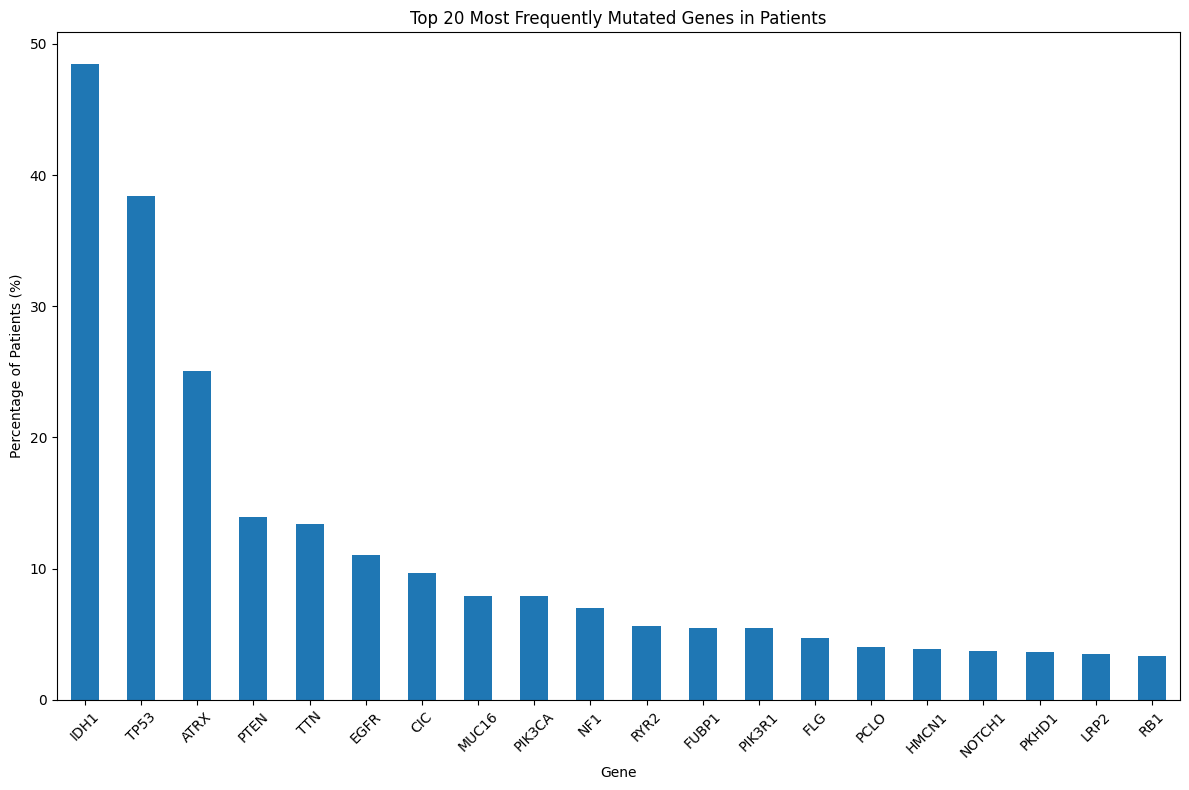

In [ ]:
import matplotlib.pyplot as plt

# Step 1: Count unique patients for each gene
gene_patient_counts = mutations_merged_df.groupby('Hugo_Symbol')['Patient ID'].nunique()

# Step 2: Calculate the percentage of patients with mutations in each gene
total_unique_patients = mutations_merged_df['Patient ID'].nunique()
gene_patient_percentages = (gene_patient_counts / total_unique_patients) * 100

# Step 3: Select the top 20 most frequently mutated genes
top_20_genes = gene_patient_percentages.nlargest(20)

# Step 4: Plotting
plt.figure(figsize=(12, 8))
top_20_genes.plot(kind='bar')
plt.xlabel("Gene")
plt.ylabel("Percentage of Patients (%)")
plt.title("Top 20 Most Frequently Mutated Genes in Patients")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# Sum of the patient percentages in the top 20 most frequently mutated genes
top_20_percentage_sum = top_20_genes.sum()
print(f"Sum of the patient percentages in the top 20 most frequently mutated genes: {top_20_percentage_sum:.2f}%")


Sum of the patient percentages in the top 20 most frequently mutated genes: 226.31%


Total number of unique patients: 745
Number of patients without mutations in any of the top 20 genes: 76


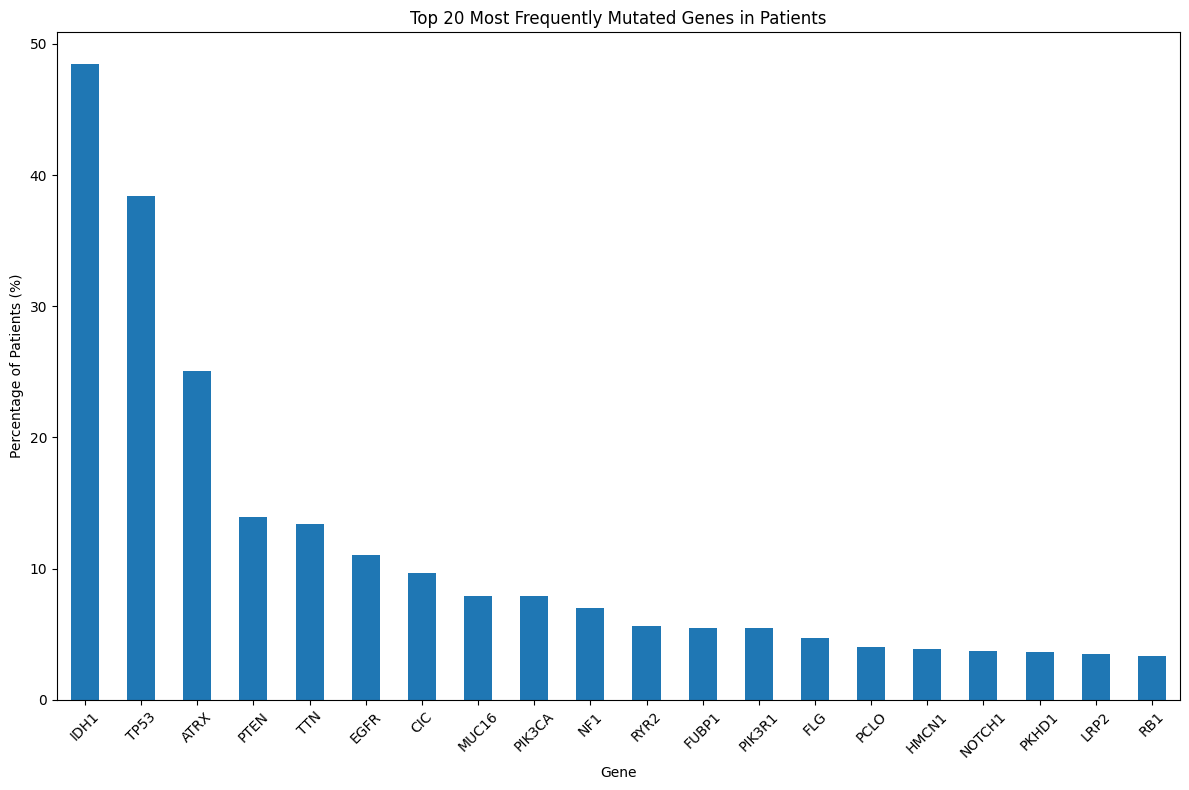

In [ ]:
import matplotlib.pyplot as plt

# Step 1: Count unique patients for each gene
gene_patient_counts = mutations_merged_df.groupby('Hugo_Symbol')['Patient ID'].nunique()

# Step 2: Calculate the percentage of patients with mutations in each gene
total_unique_patients = mutations_merged_df['Patient ID'].nunique()
gene_patient_percentages = (gene_patient_counts / total_unique_patients) * 100

# Step 3: Select the top 30 most frequently mutated genes
top_20_genes = gene_patient_percentages.nlargest(20).index

# Step 4: Identify unique patients who have mutations in any of the top 20 genes
patients_with_top_20_genes = mutations_merged_df[mutations_merged_df['Hugo_Symbol'].isin(top_20_genes)]['Patient ID'].unique()
unique_patients_with_top_20_genes = len(set(patients_with_top_20_genes))

# Step 5: Calculate the number of patients without mutations in any of the top 20 genes
patients_without_top_20_genes = total_unique_patients - unique_patients_with_top_20_genes

# Display results
print(f"Total number of unique patients: {total_unique_patients}")
print(f"Number of patients without mutations in any of the top 20 genes: {patients_without_top_20_genes}")

# Step 6: Plotting the top 20 genes by percentage of patients with mutations
top_20_percentages = gene_patient_percentages[top_20_genes]

plt.figure(figsize=(12, 8))
top_20_percentages.plot(kind='bar')
plt.xlabel("Gene")
plt.ylabel("Percentage of Patients (%)")
plt.title("Top 20 Most Frequently Mutated Genes in Patients")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


We chose top 20 genes as features, now we are going to chose 'Diagnosis Age', 'Sex', 'TMB (nonsynonymous)', 'Pan-Glioma DNA Methylation Cluster', 'Neoplasm Histologic Type Name', 'Neoplasm Histologic Grade' for clustering analysis

In [ ]:
# Step 1: Identify the top 20 most frequently mutated genes
top_20_genes = gene_patient_percentages.nlargest(20).index

# Step 2: Filter mutations_merged_df to include only rows with the top 20 genes, while retaining all patients
top_20_mutations_df = mutations_merged_df[mutations_merged_df['Hugo_Symbol'].isin(top_20_genes)]
all_patients_df = mutations_merged_df[['Patient ID']].drop_duplicates()
top_20_encoded_df = all_patients_df.merge(top_20_mutations_df, on='Patient ID', how='left')

# Step 3: One-hot encode the presence of each of the top 20 genes for all patients
for gene in top_20_genes:
    top_20_encoded_df[gene] = (top_20_encoded_df['Hugo_Symbol'] == gene).astype(int)

# Step 4: Remove columns not needed for analysis
top_20_encoded_df = top_20_encoded_df.drop(columns=['Hugo_Symbol', 'Variant_Classification', 'Tumor_Sample_Barcode'])

# Display the resulting DataFrame for verification
print("Top 20 one-hot encoded DataFrame with all patients retained:")
print(top_20_encoded_df.head())


Top 20 one-hot encoded DataFrame with all patients retained:
     Patient ID        Sample ID  IDH1  TP53  ATRX  PTEN  TTN  EGFR  CIC  \
0  TCGA-02-0003  TCGA-02-0003-01     0     0     0     0    0     1    0   
1  TCGA-02-0003  TCGA-02-0003-01     0     0     0     0    0     0    0   
2  TCGA-02-0003  TCGA-02-0003-01     0     1     0     0    0     0    0   
3  TCGA-02-0003  TCGA-02-0003-01     0     1     0     0    0     0    0   
4  TCGA-02-0033  TCGA-02-0033-01     0     0     0     0    0     0    0   

   MUC16  ...  RYR2  FUBP1  PIK3R1  FLG  PCLO  HMCN1  NOTCH1  PKHD1  LRP2  RB1  
0      0  ...     0      0       0    0     0      0       0      0     0    0  
1      0  ...     0      0       1    0     0      0       0      0     0    0  
2      0  ...     0      0       0    0     0      0       0      0     0    0  
3      0  ...     0      0       0    0     0      0       0      0     0    0  
4      0  ...     0      0       0    0     0      0       0      0     0    

In [ ]:
# Save the cleaned DataFrame
top_20_encoded_df.to_csv('top_20_encoded_df.csv', index=False)

In [ ]:
# Select relevant columns from clinical_data
clinical_columns = ['Patient ID', 'Diagnosis Age', 'Sex', 'TMB (nonsynonymous)', 'Pan-Glioma DNA Methylation Cluster', 'Neoplasm Histologic Type Name', 'Neoplasm Histologic Grade']
clinical_selected = clinical_data[clinical_columns]

# Merge the selected clinical columns with top_20_encoded_df on 'Patient ID'
merged_top_20_df = pd.merge(top_20_encoded_df, clinical_selected, on='Patient ID', how='left')

# Display the resulting DataFrame for verification
print("Merged DataFrame with top 20 encoded genes and selected clinical data:")
print(merged_top_20_df.head())


Merged DataFrame with top 20 encoded genes and selected clinical data:
     Patient ID        Sample ID  IDH1  TP53  ATRX  PTEN  TTN  EGFR  CIC  \
0  TCGA-02-0003  TCGA-02-0003-01     0     0     0     0    0     1    0   
1  TCGA-02-0003  TCGA-02-0003-01     0     0     0     0    0     0    0   
2  TCGA-02-0003  TCGA-02-0003-01     0     1     0     0    0     0    0   
3  TCGA-02-0003  TCGA-02-0003-01     0     1     0     0    0     0    0   
4  TCGA-02-0033  TCGA-02-0033-01     0     0     0     0    0     0    0   

   MUC16  ...  NOTCH1  PKHD1  LRP2  RB1  Diagnosis Age   Sex  \
0      0  ...       0      0     0    0             50  Male   
1      0  ...       0      0     0    0             50  Male   
2      0  ...       0      0     0    0             50  Male   
3      0  ...       0      0     0    0             50  Male   
4      0  ...       0      0     0    0             54  Male   

   TMB (nonsynonymous)  Pan-Glioma DNA Methylation Cluster  \
0             1.366667   

To go back to after clustering

In [ ]:
merged_before_norm_df = merged_top_20_df.copy()

In [ ]:
merged_before_norm_df

NameError: name 'merged_before_norm_df' is not defined

In [ ]:
# Group by 'Patient ID' to get unique patient entries
unique_patients_df = merged_before_norm_df.groupby('Patient ID').first()

# Count NaNs in each column
nan_counts = unique_patients_df.isnull().sum()
print("Count of NaNs in each column:")
print(nan_counts)

# Display the unique patient count after grouping
total_unique_patients = unique_patients_df.shape[0]
print(f"\nTotal Unique Patient Count: {total_unique_patients}")

# Check unique counts in 'Sex' after grouping
sex_distribution = unique_patients_df['Sex'].value_counts()
print("\nSex Distribution:")
print(sex_distribution)


Count of NaNs in each column:
Sample ID                             76
IDH1                                   0
TP53                                   0
ATRX                                   0
PTEN                                   0
TTN                                    0
EGFR                                   0
CIC                                    0
MUC16                                  0
PIK3CA                                 0
NF1                                    0
RYR2                                   0
FUBP1                                  0
PIK3R1                                 0
FLG                                    0
PCLO                                   0
HMCN1                                  0
NOTCH1                                 0
PKHD1                                  0
LRP2                                   0
RB1                                    0
Diagnosis Age                          0
Sex                                    0
TMB (nonsynonymous)        

In [ ]:
# Drop 'Sample ID' column and rows with NaNs in 'Pan-Glioma DNA Methylation Cluster'
cleaned_df = merged_before_norm_df.drop(columns=['Sample ID']).dropna(subset=['Pan-Glioma DNA Methylation Cluster'])

# Group by 'Patient ID' to get unique patient entries
unique_patients_df = cleaned_df.groupby('Patient ID').first()

# Total unique patient count
total_unique_patients = unique_patients_df.shape[0]
print(f"Total Unique Patient Count: {total_unique_patients}")

# Sex distribution
sex_distribution = unique_patients_df['Sex'].value_counts()
print("\nSex Distribution:")
print(sex_distribution)

# Age distribution
print("\nAge Distribution Statistics:")
print(unique_patients_df['Diagnosis Age'].describe())

# Neoplasm Histologic Type distribution
neoplasm_type_distribution = unique_patients_df['Neoplasm Histologic Type Name'].value_counts()
print("\nNeoplasm Histologic Type Distribution:")
print(neoplasm_type_distribution)

# Neoplasm Histologic Grade distribution
neoplasm_grade_distribution = unique_patients_df['Neoplasm Histologic Grade'].value_counts()
print("\nNeoplasm Histologic Grade Distribution:")
print(neoplasm_grade_distribution)


Total Unique Patient Count: 696

Sex Distribution:
Sex
Male      405
Female    291
Name: count, dtype: int64

Age Distribution Statistics:
count    696.000000
mean      49.573276
std       15.909649
min       14.000000
25%       36.000000
50%       50.000000
75%       62.000000
max       89.000000
Name: Diagnosis Age, dtype: float64

Neoplasm Histologic Type Distribution:
Neoplasm Histologic Type Name
glioblastoma         246
oligodendroglioma    170
astrocytoma          167
oligoastrocytoma     113
Name: count, dtype: int64

Neoplasm Histologic Grade Distribution:
Neoplasm Histologic Grade
G4    246
G3    239
G2    211
Name: count, dtype: int64


In [ ]:
unique_patients_df

,IDH1,TP53,ATRX,PTEN,TTN,EGFR,CIC,MUC16,PIK3CA,NF1,...,NOTCH1,PKHD1,LRP2,RB1,Diagnosis Age,Sex,TMB (nonsynonymous),Pan-Glioma DNA Methylation Cluster,Neoplasm Histologic Type Name,Neoplasm Histologic Grade
Patient ID,,,,,,,,,,,,,,,,,,,,,
TCGA-02-0003,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,50,Male,1.366667,LGm5,glioblastoma,G4
TCGA-02-0033,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,54,Male,0.700000,LGm5,glioblastoma,G4
TCGA-02-0047,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,78,Male,1.533333,LGm6,glioblastoma,G4
TCGA-02-0055,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,62,Female,1.400000,LGm5,glioblastoma,G4
TCGA-02-2470,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,57,Male,1.433333,LGm5,glioblastoma,G4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-VW-A7QS,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,35,Female,0.933333,LGm3,oligodendroglioma,G3
TCGA-VW-A8FI,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,66,Male,1.233333,LGm4,astrocytoma,G3
TCGA-W9-A837,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,47,Male,0.600000,LGm3,oligodendroglioma,G2


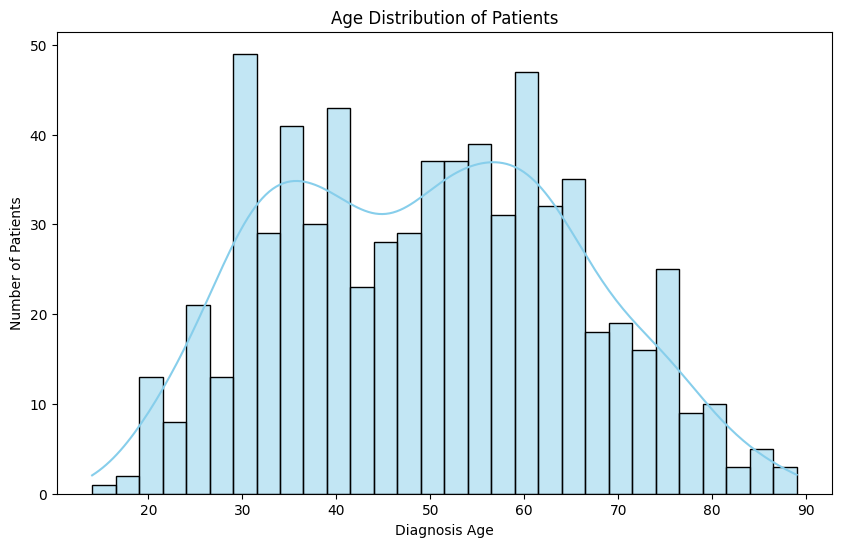

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the age distribution
plt.figure(figsize=(10, 6))
sns.histplot(unique_patients_df['Diagnosis Age'], kde=True, bins=30, color='skyblue')
plt.title('Age Distribution of Patients')
plt.xlabel('Diagnosis Age')
plt.ylabel('Number of Patients')
plt.show()

In [ ]:
# One-hot encode the Neoplasm Histologic Grade column with 0/1 encoding
encoded_grades_df = pd.get_dummies(unique_patients_df['Neoplasm Histologic Grade'], prefix='Grade').astype(int)

# Concatenate the encoded grades back to the main DataFrame
unique_patients_df = pd.concat([unique_patients_df, encoded_grades_df], axis=1)

# Drop the original Neoplasm Histologic Grade column if it is no longer needed
unique_patients_df = unique_patients_df.drop(columns=['Neoplasm Histologic Grade'])

# Display the resulting DataFrame for verification
print("DataFrame with one-hot encoded Neoplasm Histologic Grade as 0/1:")
print(unique_patients_df.head())


DataFrame with one-hot encoded Neoplasm Histologic Grade as 0/1:
              IDH1  TP53  ATRX  PTEN  TTN  EGFR  CIC  MUC16  PIK3CA  NF1  ...  \
Patient ID                                                                ...   
TCGA-02-0003     0     0     0     0    0     1    0      0       0    0  ...   
TCGA-02-0033     0     0     0     0    0     0    0      0       0    1  ...   
TCGA-02-0047     0     0     0     0    0     0    0      0       1    0  ...   
TCGA-02-0055     0     0     0     1    0     0    0      0       0    0  ...   
TCGA-02-2470     0     0     0     1    0     0    0      0       0    0  ...   

              LRP2  RB1  Diagnosis Age     Sex  TMB (nonsynonymous)  \
Patient ID                                                            
TCGA-02-0003     0    0             50    Male             1.366667   
TCGA-02-0033     0    0             54    Male             0.700000   
TCGA-02-0047     0    0             78    Male             1.533333   
TCGA-02-0055

In [ ]:

# Encode Sex: 1 for 'Male', 0 for 'Female'
unique_patients_df['Sex'] = unique_patients_df['Sex'].map({'Male': 1, 'Female': 0}).astype(int)


# Display the resulting DataFrame for verification
print("DataFrame with encoded Sex as 1/0:")
print(unique_patients_df.head())


DataFrame with encoded Sex as 1/0:
              IDH1  TP53  ATRX  PTEN  TTN  EGFR  CIC  MUC16  PIK3CA  NF1  ...  \
Patient ID                                                                ...   
TCGA-02-0003     0     0     0     0    0     1    0      0       0    0  ...   
TCGA-02-0033     0     0     0     0    0     0    0      0       0    1  ...   
TCGA-02-0047     0     0     0     0    0     0    0      0       1    0  ...   
TCGA-02-0055     0     0     0     1    0     0    0      0       0    0  ...   
TCGA-02-2470     0     0     0     1    0     0    0      0       0    0  ...   

              LRP2  RB1  Diagnosis Age  Sex  TMB (nonsynonymous)  \
Patient ID                                                         
TCGA-02-0003     0    0             50    1             1.366667   
TCGA-02-0033     0    0             54    1             0.700000   
TCGA-02-0047     0    0             78    1             1.533333   
TCGA-02-0055     0    0             62    0             1

In [ ]:
# One-hot encode the Pan-Glioma DNA Methylation Cluster with 0/1 encoding
encoded_grades_df = pd.get_dummies(unique_patients_df['Pan-Glioma DNA Methylation Cluster'], prefix='Meth').astype(int)

# Concatenate the encoded grades back to the main DataFrame
unique_patients_df = pd.concat([unique_patients_df, encoded_grades_df], axis=1)

# Drop the original Neoplasm Histologic Grade column if it is no longer needed
unique_patients_df = unique_patients_df.drop(columns=['Pan-Glioma DNA Methylation Cluster'])

# Display the resulting DataFrame for verification
print("DataFrame with one-hot encoded Pan-Glioma DNA Methylation Cluster as 0/1:")
print(unique_patients_df.head())


DataFrame with one-hot encoded Pan-Glioma DNA Methylation Cluster as 0/1:
              IDH1  TP53  ATRX  PTEN  TTN  EGFR  CIC  MUC16  PIK3CA  NF1  ...  \
Patient ID                                                                ...   
TCGA-02-0003     0     0     0     0    0     1    0      0       0    0  ...   
TCGA-02-0033     0     0     0     0    0     0    0      0       0    1  ...   
TCGA-02-0047     0     0     0     0    0     0    0      0       1    0  ...   
TCGA-02-0055     0     0     0     1    0     0    0      0       0    0  ...   
TCGA-02-2470     0     0     0     1    0     0    0      0       0    0  ...   

              Neoplasm Histologic Type Name  Grade_G2  Grade_G3  Grade_G4  \
Patient ID                                                                  
TCGA-02-0003                   glioblastoma         0         0         1   
TCGA-02-0033                   glioblastoma         0         0         1   
TCGA-02-0047                   glioblastoma       

In [ ]:
# Display the counts for each unique variable in the 'Neoplasm Histologic Type Name' column
type_counts = unique_patients_df['Neoplasm Histologic Type Name'].value_counts()

# Print the counts
print("Counts for each Neoplasm Histologic Type:")
print(type_counts)

Counts for each Neoplasm Histologic Type:
Neoplasm Histologic Type Name
glioblastoma         246
oligodendroglioma    170
astrocytoma          167
oligoastrocytoma     113
Name: count, dtype: int64


In [ ]:
# Ensure one-hot encoding columns are integers (1/0)
unique_patients_df = pd.concat([unique_patients_df, pd.get_dummies(unique_patients_df['Neoplasm Histologic Type Name'], prefix='Type').astype(int)], axis=1)

# Display the first few rows to verify
print("DataFrame with one-hot encoding for 'Neoplasm Histologic Type Name':")
print(unique_patients_df.head())


DataFrame with one-hot encoding for 'Neoplasm Histologic Type Name':
              IDH1  TP53  ATRX  PTEN  TTN  EGFR  CIC  MUC16  PIK3CA  NF1  ...  \
Patient ID                                                                ...   
TCGA-02-0003     0     0     0     0    0     1    0      0       0    0  ...   
TCGA-02-0033     0     0     0     0    0     0    0      0       0    1  ...   
TCGA-02-0047     0     0     0     0    0     0    0      0       1    0  ...   
TCGA-02-0055     0     0     0     1    0     0    0      0       0    0  ...   
TCGA-02-2470     0     0     0     1    0     0    0      0       0    0  ...   

              Meth_LGm1  Meth_LGm2  Meth_LGm3  Meth_LGm4  Meth_LGm5  \
Patient ID                                                            
TCGA-02-0003          0          0          0          0          1   
TCGA-02-0033          0          0          0          0          1   
TCGA-02-0047          0          0          0          0          0   
TCGA-02-

In [ ]:
unique_patients_df

,IDH1,TP53,ATRX,PTEN,TTN,EGFR,CIC,MUC16,PIK3CA,NF1,...,Meth_LGm1,Meth_LGm2,Meth_LGm3,Meth_LGm4,Meth_LGm5,Meth_LGm6,Type_astrocytoma,Type_glioblastoma,Type_oligoastrocytoma,Type_oligodendroglioma
Patient ID,,,,,,,,,,,,,,,,,,,,,
TCGA-02-0003,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
TCGA-02-0033,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
TCGA-02-0047,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
TCGA-02-0055,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
TCGA-02-2470,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-VW-A7QS,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
TCGA-VW-A8FI,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
TCGA-W9-A837,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [ ]:
unique_patients_df.columns

Index(['IDH1', 'TP53', 'ATRX', 'PTEN', 'TTN', 'EGFR', 'CIC', 'MUC16', 'PIK3CA',
       'NF1', 'RYR2', 'FUBP1', 'PIK3R1', 'FLG', 'PCLO', 'HMCN1', 'NOTCH1',
       'PKHD1', 'LRP2', 'RB1', 'Diagnosis Age', 'Sex', 'TMB (nonsynonymous)',
       'Neoplasm Histologic Type Name', 'Grade_G2', 'Grade_G3', 'Grade_G4',
       'Meth_LGm1', 'Meth_LGm2', 'Meth_LGm3', 'Meth_LGm4', 'Meth_LGm5',
       'Meth_LGm6', 'Type_astrocytoma', 'Type_glioblastoma',
       'Type_oligoastrocytoma', 'Type_oligodendroglioma'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Save the result into a new DataFrame
normalized_df = unique_patients_df.copy()

# Normalize 'Diagnosis Age' and 'TMB (nonsynonymous)' columns
normalized_df[['Diagnosis Age', 'TMB (nonsynonymous)']] = scaler.fit_transform(
    normalized_df[['Diagnosis Age', 'TMB (nonsynonymous)']]
)



# Display the resulting DataFrame for verification
print("Normalized DataFrame with Diagnosis Age and TMB (nonsynonymous):")
print(normalized_df.head())


Normalized DataFrame with Diagnosis Age and TMB (nonsynonymous):
              IDH1  TP53  ATRX  PTEN  TTN  EGFR  CIC  MUC16  PIK3CA  NF1  ...  \
Patient ID                                                                ...   
TCGA-02-0003     0     0     0     0    0     1    0      0       0    0  ...   
TCGA-02-0033     0     0     0     0    0     0    0      0       0    1  ...   
TCGA-02-0047     0     0     0     0    0     0    0      0       1    0  ...   
TCGA-02-0055     0     0     0     1    0     0    0      0       0    0  ...   
TCGA-02-2470     0     0     0     1    0     0    0      0       0    0  ...   

              Meth_LGm1  Meth_LGm2  Meth_LGm3  Meth_LGm4  Meth_LGm5  \
Patient ID                                                            
TCGA-02-0003          0          0          0          0          1   
TCGA-02-0033          0          0          0          0          1   
TCGA-02-0047          0          0          0          0          0   
TCGA-02-0055

In [ ]:
print(normalized_df.columns.tolist())

['IDH1', 'TP53', 'ATRX', 'PTEN', 'TTN', 'EGFR', 'CIC', 'MUC16', 'PIK3CA', 'NF1', 'RYR2', 'FUBP1', 'PIK3R1', 'FLG', 'PCLO', 'HMCN1', 'NOTCH1', 'PKHD1', 'LRP2', 'RB1', 'Diagnosis Age', 'Sex', 'TMB (nonsynonymous)', 'Neoplasm Histologic Type Name', 'Grade_G2', 'Grade_G3', 'Grade_G4', 'Meth_LGm1', 'Meth_LGm2', 'Meth_LGm3', 'Meth_LGm4', 'Meth_LGm5', 'Meth_LGm6', 'Type_astrocytoma', 'Type_glioblastoma', 'Type_oligoastrocytoma', 'Type_oligodendroglioma']


In [ ]:
#drop 'Neoplasm Histologic Type Name' from normalized_df
normalized_df = normalized_df.drop(columns=['Neoplasm Histologic Type Name'])

In [ ]:
print(normalized_df.columns.tolist())

['IDH1', 'TP53', 'ATRX', 'PTEN', 'TTN', 'EGFR', 'CIC', 'MUC16', 'PIK3CA', 'NF1', 'RYR2', 'FUBP1', 'PIK3R1', 'FLG', 'PCLO', 'HMCN1', 'NOTCH1', 'PKHD1', 'LRP2', 'RB1', 'Diagnosis Age', 'Sex', 'TMB (nonsynonymous)', 'Grade_G2', 'Grade_G3', 'Grade_G4', 'Meth_LGm1', 'Meth_LGm2', 'Meth_LGm3', 'Meth_LGm4', 'Meth_LGm5', 'Meth_LGm6', 'Type_astrocytoma', 'Type_glioblastoma', 'Type_oligoastrocytoma', 'Type_oligodendroglioma']


In [ ]:
normalized_df

,IDH1,TP53,ATRX,PTEN,TTN,EGFR,CIC,MUC16,PIK3CA,NF1,...,Meth_LGm1,Meth_LGm2,Meth_LGm3,Meth_LGm4,Meth_LGm5,Meth_LGm6,Type_astrocytoma,Type_glioblastoma,Type_oligoastrocytoma,Type_oligodendroglioma
Patient ID,,,,,,,,,,,,,,,,,,,,,
TCGA-02-0003,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
TCGA-02-0033,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
TCGA-02-0047,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
TCGA-02-0055,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
TCGA-02-2470,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-VW-A7QS,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
TCGA-VW-A8FI,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
TCGA-W9-A837,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [ ]:
print(normalized_df.index)
print(normalized_df.columns)

RangeIndex(start=0, stop=696, step=1)
Index(['Patient ID', 'IDH1', 'TP53', 'ATRX', 'PTEN', 'TTN', 'EGFR', 'CIC',
       'MUC16', 'PIK3CA', 'NF1', 'RYR2', 'FUBP1', 'PIK3R1', 'FLG', 'PCLO',
       'HMCN1', 'NOTCH1', 'PKHD1', 'LRP2', 'RB1', 'Diagnosis Age', 'Sex',
       'TMB (nonsynonymous)', 'Grade_G2', 'Grade_G3', 'Grade_G4', 'Meth_LGm1',
       'Meth_LGm2', 'Meth_LGm3', 'Meth_LGm4', 'Meth_LGm5', 'Meth_LGm6',
       'Type_astrocytoma', 'Type_glioblastoma', 'Type_oligoastrocytoma',
       'Type_oligodendroglioma'],
      dtype='object')


In [ ]:
normalized_df = normalized_df.reset_index()


Clustering
Unsupervised Clustering of Molecular Subtypes
   - Goal: Discover molecular subtypes of the cancer based on mutation patterns and clinical features.
   - Features to Use: `Hugo_Symbol`,Grade, Type, Methylation (one-hot encoded for multiple mutations), Sex, Age and TMB
   - Approach:Use algorithms like K-Means, Hierarchical Clustering, or DBSCAN for clustering. Apply dimensionality reduction techniques like PCA to visualize the clusters.
   -Evaluation:Examine how clusters correlate with clinical features such as survival outcomes, IDH status, or WHO Grade

In [ ]:

# Verify 'Patient ID' is in the original DataFrame
assert 'Patient ID' in normalized_df.columns, "Patient ID is missing from the DataFrame."

# Group by 'Patient ID' and aggregate
clustering_df = normalized_df.groupby('Patient ID', as_index=False).agg({
    **{col: 'max' for col in normalized_df.columns if col not in ['Patient ID', 'Diagnosis Age', 'TMB (nonsynonymous)']},
    'Diagnosis Age': 'mean',
    'TMB (nonsynonymous)': 'mean'
})

# Display the resulting DataFrame for verification
print("Clustering DataFrame with features aggregated by Patient ID:")
print(clustering_df.head())


Clustering DataFrame with features aggregated by Patient ID:
     Patient ID  IDH1  TP53  ATRX  PTEN  TTN  EGFR  CIC  MUC16  PIK3CA  ...  \
0  TCGA-02-0003     0     0     0     0    0     1    0      0       0  ...   
1  TCGA-02-0033     0     0     0     0    0     0    0      0       0  ...   
2  TCGA-02-0047     0     0     0     0    0     0    0      0       1  ...   
3  TCGA-02-0055     0     0     0     1    0     0    0      0       0  ...   
4  TCGA-02-2470     0     0     0     1    0     0    0      0       0  ...   

   Meth_LGm3  Meth_LGm4  Meth_LGm5  Meth_LGm6  Type_astrocytoma  \
0          0          0          1          0                 0   
1          0          0          1          0                 0   
2          0          0          0          1                 0   
3          0          0          1          0                 0   
4          0          0          1          0                 0   

   Type_glioblastoma  Type_oligoastrocytoma  Type_oligodendro

In [ ]:
clustering_df

,Patient ID,IDH1,TP53,ATRX,PTEN,TTN,EGFR,CIC,MUC16,PIK3CA,...,Meth_LGm3,Meth_LGm4,Meth_LGm5,Meth_LGm6,Type_astrocytoma,Type_glioblastoma,Type_oligoastrocytoma,Type_oligodendroglioma,Diagnosis Age,TMB (nonsynonymous)
0,TCGA-02-0003,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0.480000,0.106101
1,TCGA-02-0033,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0.533333,0.053050
2,TCGA-02-0047,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,1,0,0,0.853333,0.119363
3,TCGA-02-0055,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0.640000,0.108753
4,TCGA-02-2470,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0.573333,0.111406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,TCGA-VW-A7QS,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0.280000,0.071618
692,TCGA-VW-A8FI,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0.693333,0.095491
693,TCGA-W9-A837,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0.440000,0.045093
694,TCGA-WH-A86K,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0.680000,0.071618


To keep 57 patients without mutations

In [ ]:
# To keep 57 patients without mutations
#Initial Step: Create clustering_df with features aggregated by Patient ID
# (Code from previous response)

# Step 2: Identify patients without mutations in the top 20 genes and add them back with zeros for mutation columns

# List of top 20 gene mutation columns
mutation_columns = [col for col in clustering_df.columns if col in top_20_genes]

# Find patients without any mutations in the top 20 genes
patients_with_mutations = clustering_df[mutation_columns].sum(axis=1) > 0
patients_without_mutations_df = clustering_df[~patients_with_mutations].copy()

# Set all gene mutation columns to 0 for these patients
for gene in top_20_genes:
    patients_without_mutations_df[gene] = 0

# Concatenate the two DataFrames to ensure all patients are included
clustering_df = pd.concat([clustering_df[patients_with_mutations], patients_without_mutations_df], ignore_index=True)

# Display the final DataFrame for verification
print("Final clustering DataFrame including patients without mutations in the top 20 genes:")
print(clustering_df.head())
clustering_df

Final clustering DataFrame including patients without mutations in the top 20 genes:
     Patient ID  IDH1  TP53  ATRX  PTEN  TTN  EGFR  CIC  MUC16  PIK3CA  ...  \
0  TCGA-02-0003     0     0     0     0    0     1    0      0       0  ...   
1  TCGA-02-0033     0     0     0     0    0     0    0      0       0  ...   
2  TCGA-02-0047     0     0     0     0    0     0    0      0       1  ...   
3  TCGA-02-0055     0     0     0     1    0     0    0      0       0  ...   
4  TCGA-02-2470     0     0     0     1    0     0    0      0       0  ...   

   Meth_LGm3  Meth_LGm4  Meth_LGm5  Meth_LGm6  Type_astrocytoma  \
0          0          0          1          0                 0   
1          0          0          1          0                 0   
2          0          0          0          1                 0   
3          0          0          1          0                 0   
4          0          0          1          0                 0   

   Type_glioblastoma  Type_oligoastro

,Patient ID,IDH1,TP53,ATRX,PTEN,TTN,EGFR,CIC,MUC16,PIK3CA,...,Meth_LGm3,Meth_LGm4,Meth_LGm5,Meth_LGm6,Type_astrocytoma,Type_glioblastoma,Type_oligoastrocytoma,Type_oligodendroglioma,Diagnosis Age,TMB (nonsynonymous)
0,TCGA-02-0003,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0.480000,0.106101
1,TCGA-02-0033,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0.533333,0.053050
2,TCGA-02-0047,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,1,0,0,0.853333,0.119363
3,TCGA-02-0055,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0.640000,0.108753
4,TCGA-02-2470,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0.573333,0.111406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,TCGA-P5-A730,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0.106667,0.045093
692,TCGA-QH-A65X,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0.186667,0.042440
693,TCGA-S9-A6TY,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0.480000,0.031830
694,TCGA-S9-A7QY,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0.280000,0.047745


In [ ]:
# Number of rows in clustering_df
clustering_df_rows = clustering_df.shape[0]

print("Number of rows in clustering_df:", clustering_df_rows)

Number of rows in clustering_df: 696


PCA before hierarchical clustering

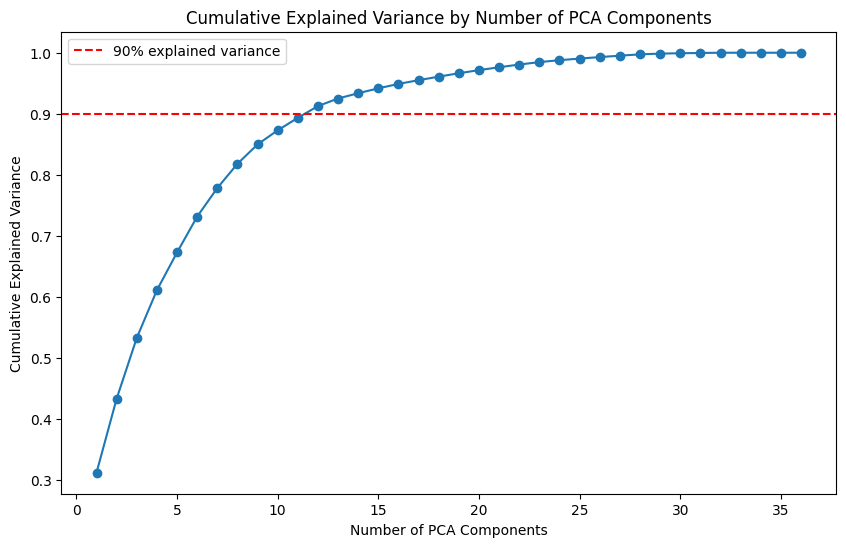

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Step 1: Set 'Patient ID' as the index to preserve it
clustering_df = clustering_df.set_index('Patient ID')

# Step 2: Define the features for PCA, excluding 'Patient ID' since it's now the index
features = clustering_df  # Index already set; no need to drop 'Patient ID'

# Step 3: Apply PCA without specifying n_components initially to calculate explained variance
pca = PCA()
pca.fit(features)

# Step 4: Calculate cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Step 5: Plot cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Number of PCA Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Number of PCA Components')
plt.axhline(y=0.9, color='r', linestyle='--', label="90% explained variance")
plt.legend()
plt.show()



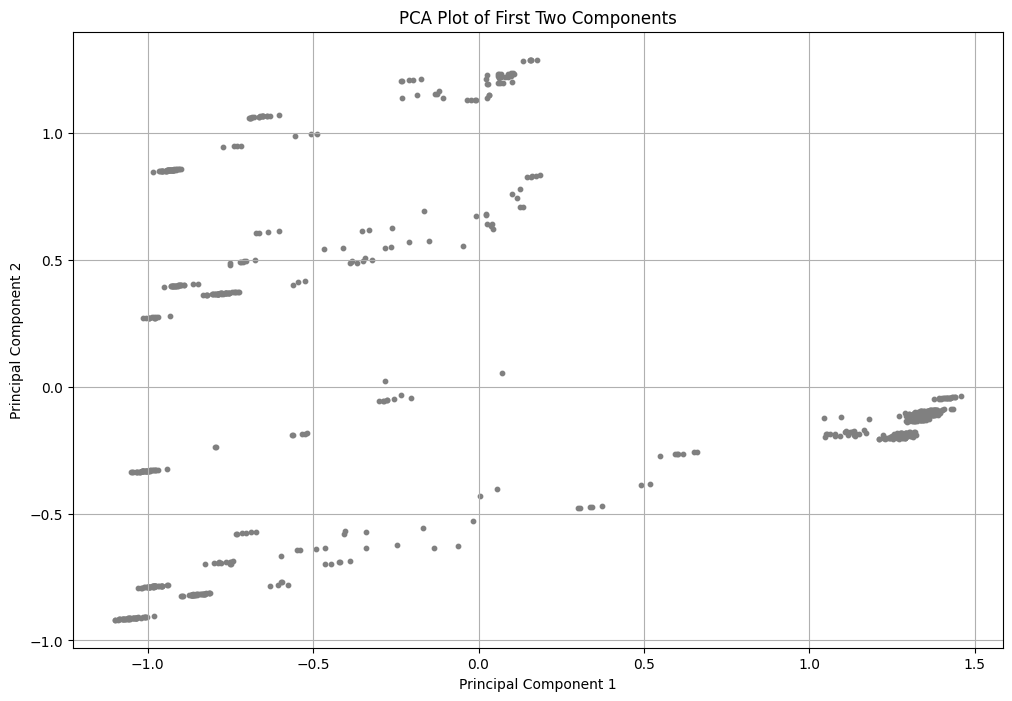

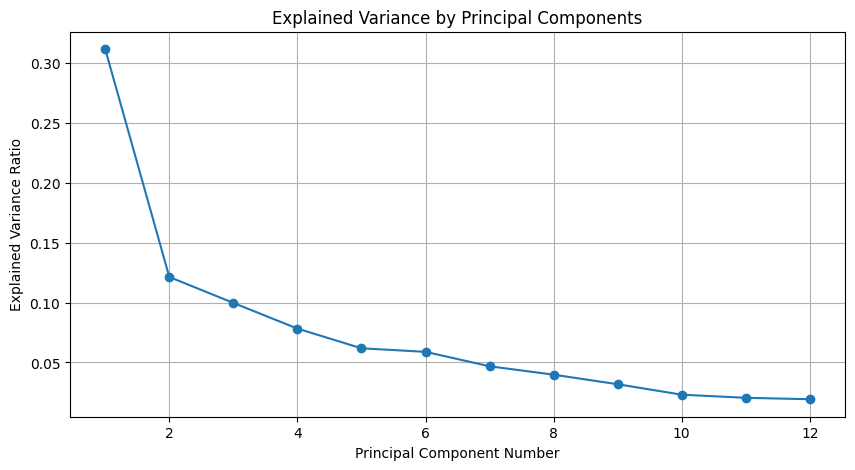

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage, dendrogram

# Step 1: Apply PCA with 12 components
pca = PCA(n_components=12)
pca_result = pca.fit_transform(features)  # 'features' should be clustering_df without 'Patient ID'

pca_df = pd.DataFrame(pca_result, columns=[f'PC{i+1}' for i in range(12)])

# Step 3: Plot the first two principal components
plt.figure(figsize=(12, 8))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c='grey', s=10)  # No cluster information used for coloring
plt.title('PCA Plot of First Two Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

# Optional: Explained variance plot
plt.figure(figsize=(10, 5))
plt.plot(range(1, 13), pca.explained_variance_ratio_, marker='o')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Principal Component Number')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()



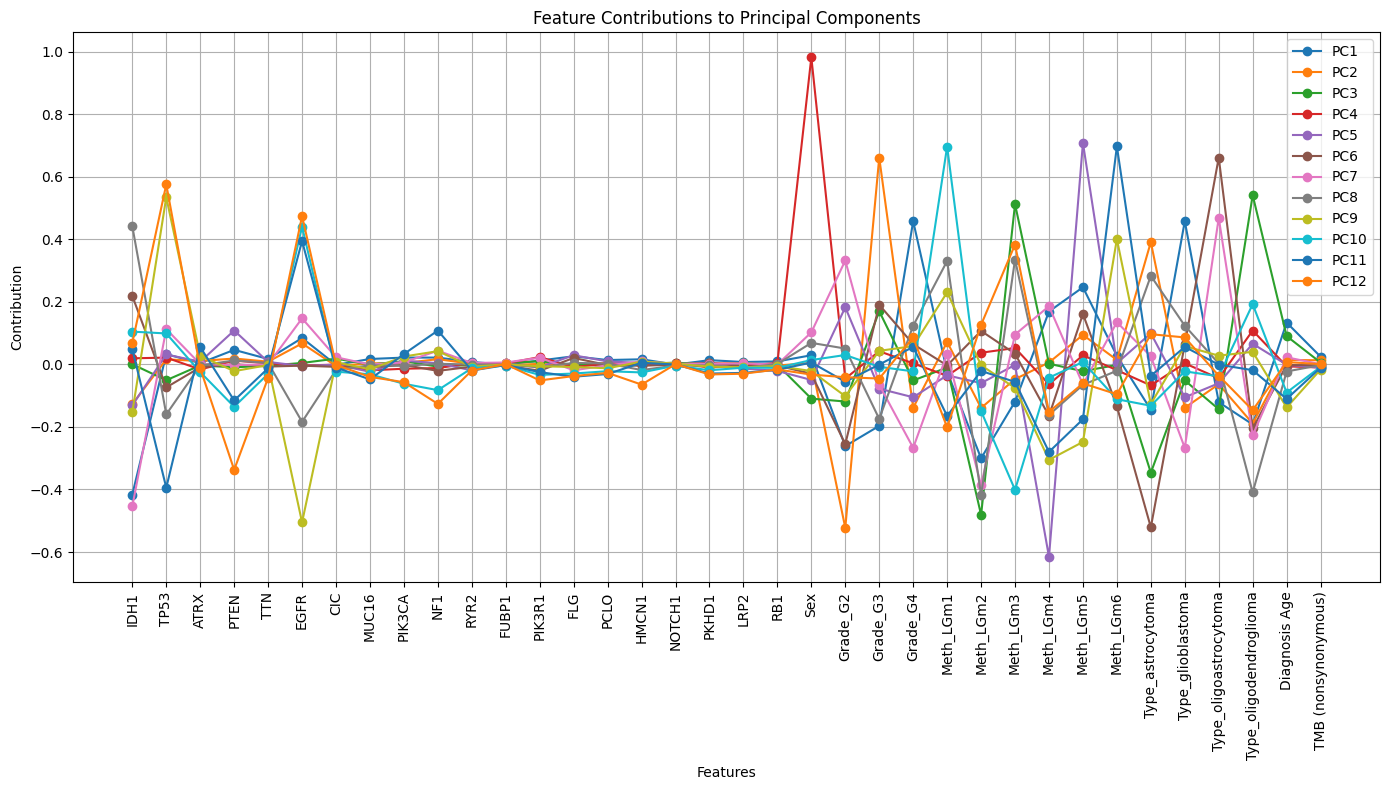

In [ ]:
# Create a DataFrame to show the contribution of each feature to each principal component
feature_contributions = pd.DataFrame(pca.components_, columns=features.columns, index=[f'PC{i+1}' for i in range(12)])

# Plot the feature contribution for the first few principal components (e.g., first 3)
plt.figure(figsize=(14, 8))
for i in range(12):  # Adjust this number as needed to show more PCs
    plt.plot(feature_contributions.columns, feature_contributions.iloc[i], marker='o', label=f'PC{i+1}')

plt.title('Feature Contributions to Principal Components')
plt.xlabel('Features')
plt.ylabel('Contribution')
plt.xticks(rotation=90)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

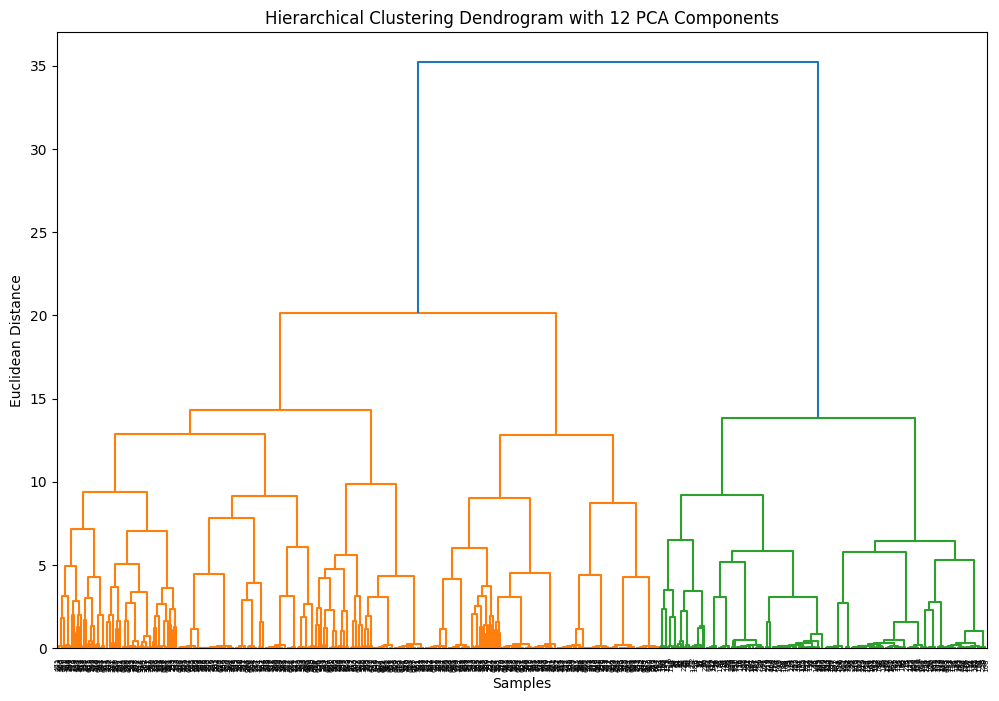

In [ ]:

# Step 2: Perform hierarchical clustering on the PCA-reduced data
# Using 'ward' linkage, which minimizes variance within clusters
linked = linkage(pca_result, method='ward')

# Step 3: Plot the dendrogram for visual inspection
plt.figure(figsize=(12, 8))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=False)
plt.title("Hierarchical Clustering Dendrogram with 12 PCA Components")
plt.xlabel("Samples")
plt.ylabel("Euclidean Distance")
plt.show()


From the dendrogram, a cutoff at a Euclidean distance around 12 seems reasonable, as it separates the branches into several clear clusters.
This cutoff will likely yield 6 clusters. You could experiment with cutting the tree at this height to see if it produces meaningful clusters.

In [ ]:
from scipy.cluster.hierarchy import fcluster

# Step 4: Define clusters based on the chosen distance cutoff
distance_cutoff = 12  # Adjust this based on dendrogram inspection
clusters = fcluster(linked, distance_cutoff, criterion='distance')

# Reset the index to bring 'Patient ID' back as a column
post_clustering_df = clustering_df.reset_index()

# Add the cluster labels to the DataFrame
post_clustering_df['Cluster'] = clusters

# Display the first few rows to verify
print("Data with assigned clusters based on hierarchical clustering:")
post_clustering_df.head()


Data with assigned clusters based on hierarchical clustering:


,Patient ID,IDH1,TP53,ATRX,PTEN,TTN,EGFR,CIC,MUC16,PIK3CA,...,Meth_LGm4,Meth_LGm5,Meth_LGm6,Type_astrocytoma,Type_glioblastoma,Type_oligoastrocytoma,Type_oligodendroglioma,Diagnosis Age,TMB (nonsynonymous),Cluster
0,TCGA-02-0003,0,0,0,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0.480000,0.106101,1
1,TCGA-02-0033,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0.533333,0.053050,1
2,TCGA-02-0047,0,0,0,0,0,0,0,0,1,...,0,0,1,0,1,0,0,0.853333,0.119363,2
3,TCGA-02-0055,0,0,0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0.640000,0.108753,1
4,TCGA-02-2470,0,0,0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0.573333,0.111406,1


In [ ]:
clustering_df.columns

Index(['Patient ID', 'IDH1', 'TP53', 'ATRX', 'PTEN', 'TTN', 'EGFR', 'CIC',
       'MUC16', 'PIK3CA', 'NF1', 'RYR2', 'FUBP1', 'PIK3R1', 'FLG', 'PCLO',
       'HMCN1', 'NOTCH1', 'PKHD1', 'LRP2', 'RB1', 'IDH status', 'Sex', 'HM27',
       'Grade_G2', 'Grade_G3', 'Grade_G4', 'Meth_LGm1', 'Meth_LGm2',
       'Meth_LGm3', 'Meth_LGm4', 'Meth_LGm5', 'Meth_LGm6', 'Diagnosis Age',
       'TMB (nonsynonymous)', 'Cluster'],
      dtype='object')

In [ ]:
post_clustering_df.columns

Index(['Patient ID', 'IDH1', 'TP53', 'ATRX', 'PTEN', 'TTN', 'EGFR', 'CIC',
       'MUC16', 'PIK3CA', 'NF1', 'RYR2', 'FUBP1', 'PIK3R1', 'FLG', 'PCLO',
       'HMCN1', 'NOTCH1', 'PKHD1', 'LRP2', 'RB1', 'Sex', 'Grade_G2',
       'Grade_G3', 'Grade_G4', 'Meth_LGm1', 'Meth_LGm2', 'Meth_LGm3',
       'Meth_LGm4', 'Meth_LGm5', 'Meth_LGm6', 'Type_astrocytoma',
       'Type_glioblastoma', 'Type_oligoastrocytoma', 'Type_oligodendroglioma',
       'Diagnosis Age', 'TMB (nonsynonymous)', 'Cluster'],
      dtype='object')

In [ ]:
# Cluster column values
post_clustering_df['Cluster'].value_counts()


,count
Cluster,
2,124
1,122
6,103
4,99
7,90
5,82
3,76


In [ ]:
# Merge the cluster labels back into the original untransformed data
merged_before_norm_df_with_clusters = merged_before_norm_df.merge(post_clustering_df[['Patient ID', 'Cluster']], on='Patient ID', how='left')

# Display the first few rows to verify
print("Original DataFrame with Cluster Assignments:")
print(merged_before_norm_df_with_clusters.head())


Original DataFrame with Cluster Assignments:
     Patient ID        Sample ID  IDH1  TP53  ATRX  PTEN  TTN  EGFR  CIC  \
0  TCGA-02-0003  TCGA-02-0003-01     0     0     0     0    0     1    0   
1  TCGA-02-0003  TCGA-02-0003-01     0     0     0     0    0     0    0   
2  TCGA-02-0003  TCGA-02-0003-01     0     1     0     0    0     0    0   
3  TCGA-02-0003  TCGA-02-0003-01     0     1     0     0    0     0    0   
4  TCGA-02-0033  TCGA-02-0033-01     0     0     0     0    0     0    0   

   MUC16  ...  PKHD1  LRP2  RB1  Diagnosis Age   Sex  TMB (nonsynonymous)  \
0      0  ...      0     0    0             50  Male             1.366667   
1      0  ...      0     0    0             50  Male             1.366667   
2      0  ...      0     0    0             50  Male             1.366667   
3      0  ...      0     0    0             50  Male             1.366667   
4      0  ...      0     0    0             54  Male             0.700000   

   Pan-Glioma DNA Methylation Clust

In [ ]:
merged_before_norm_df_with_clusters.columns

Index(['Patient ID', 'Sample ID', 'IDH1', 'TP53', 'ATRX', 'PTEN', 'TTN',
       'EGFR', 'CIC', 'MUC16', 'PIK3CA', 'NF1', 'RYR2', 'FUBP1', 'PIK3R1',
       'FLG', 'PCLO', 'HMCN1', 'NOTCH1', 'PKHD1', 'LRP2', 'RB1',
       'Diagnosis Age', 'Sex', 'TMB (nonsynonymous)',
       'Pan-Glioma DNA Methylation Cluster', 'Neoplasm Histologic Type Name',
       'Neoplasm Histologic Grade', 'Cluster'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Define numeric columns and non-numeric columns
numeric_columns = merged_before_norm_df_with_clusters.select_dtypes(include=[np.number]).columns
non_numeric_columns = merged_before_norm_df_with_clusters.select_dtypes(exclude=[np.number]).columns

# Normalize 'Age' column and other numeric columns if needed
scaler = MinMaxScaler()
merged_before_norm_df_with_clusters['Age_normalized'] = scaler.fit_transform(merged_before_norm_df_with_clusters[['Diagnosis Age']])

# Now, you can proceed with visualizations using 'Age_normalized' instead of 'Age' to avoid scale issues


In [ ]:
# Identify numeric and non-numeric columns
numeric_columns = merged_before_norm_df_with_clusters.select_dtypes(include=[np.number]).columns
non_numeric_columns = merged_before_norm_df_with_clusters.select_dtypes(exclude=[np.number]).columns

# Group by cluster and calculate summary statistics
cluster_profile = merged_before_norm_df_with_clusters.groupby('Cluster').agg({
    **{col: ['mean', 'median'] for col in numeric_columns if col not in ['Cluster']},  # Mean and median for numeric columns
    **{col: lambda x: x.value_counts().idxmax() for col in non_numeric_columns if col not in ['Cluster', 'Patient ID', 'Sample ID']}  # Most common value for non-numeric columns
})

# Display cluster profiles
print("Cluster Profile Summary:")
print(cluster_profile)


Cluster Profile Summary:
             IDH1             TP53             ATRX             PTEN         \
             mean median      mean median      mean median      mean median   
Cluster                                                                       
1.0      0.003690    0.0  0.158672    0.0  0.011070    0.0  0.151292    0.0   
2.0      0.047782    0.0  0.139932    0.0  0.051195    0.0  0.098976    0.0   
3.0      0.324675    0.0  0.333333    0.0  0.229437    0.0  0.000000    0.0   
4.0      0.341880    0.0  0.106838    0.0  0.098291    0.0  0.008547    0.0   
5.0      0.337838    0.0  0.063063    0.0  0.054054    0.0  0.004505    0.0   
6.0      0.326861    0.0  0.330097    0.0  0.197411    0.0  0.006472    0.0   
7.0      0.061404    0.0  0.153509    0.0  0.109649    0.0  0.074561    0.0   

              TTN         ... Diagnosis Age        TMB (nonsynonymous)  \
             mean median  ...          mean median                mean   
Cluster                   ...       

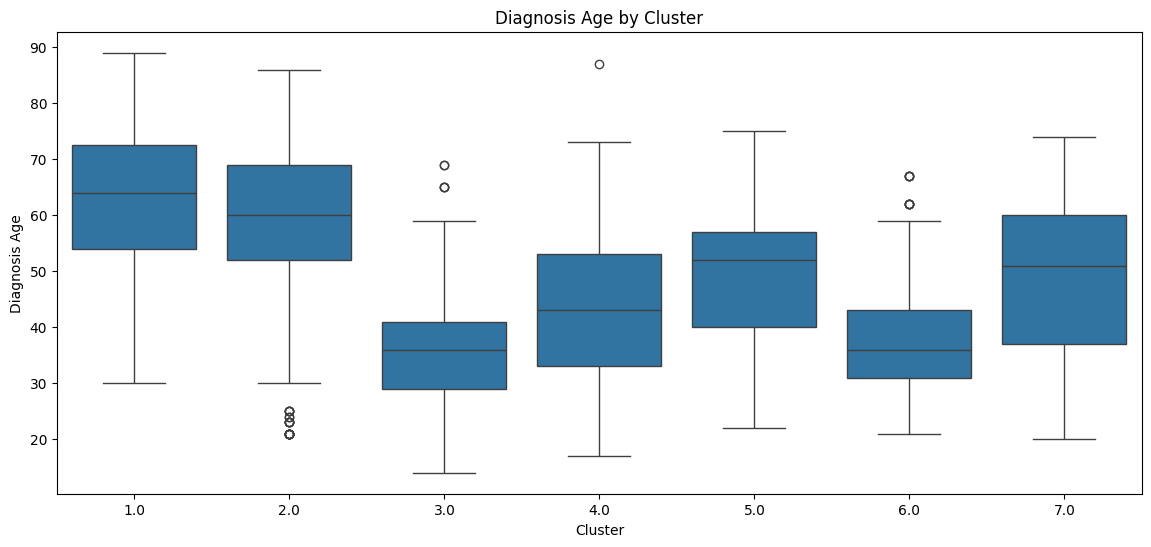

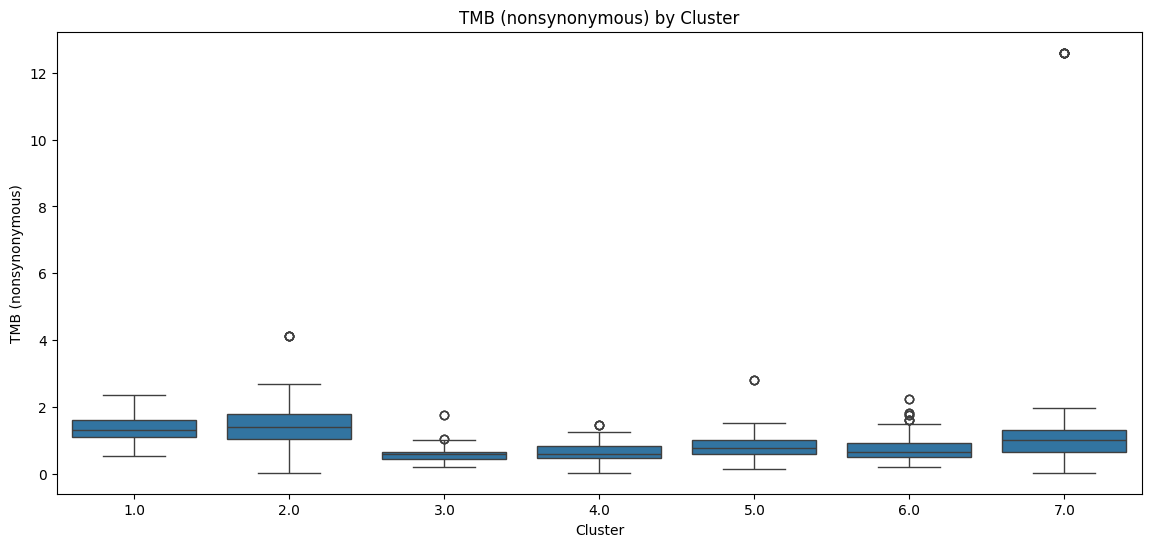

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box plot for Diagnosis Age and TMB (nonsynonymous)
plt.figure(figsize=(14, 6))
sns.boxplot(data=merged_before_norm_df_with_clusters, x='Cluster', y='Diagnosis Age')
plt.title('Diagnosis Age by Cluster')
plt.show()

plt.figure(figsize=(14, 6))
sns.boxplot(data=merged_before_norm_df_with_clusters, x='Cluster', y='TMB (nonsynonymous)')
plt.title('TMB (nonsynonymous) by Cluster')
plt.show()


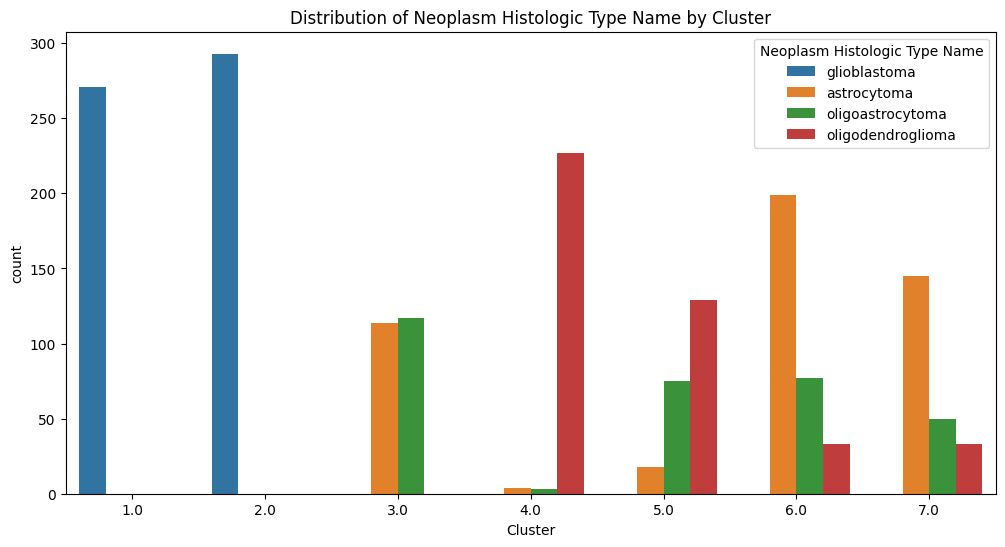

In [ ]:
# Bar plot for the most common Neoplasm Histologic Type Name by cluster
plt.figure(figsize=(12, 6))
sns.countplot(data=merged_before_norm_df_with_clusters, x='Cluster', hue='Neoplasm Histologic Type Name')
plt.title('Distribution of Neoplasm Histologic Type Name by Cluster')
plt.show()


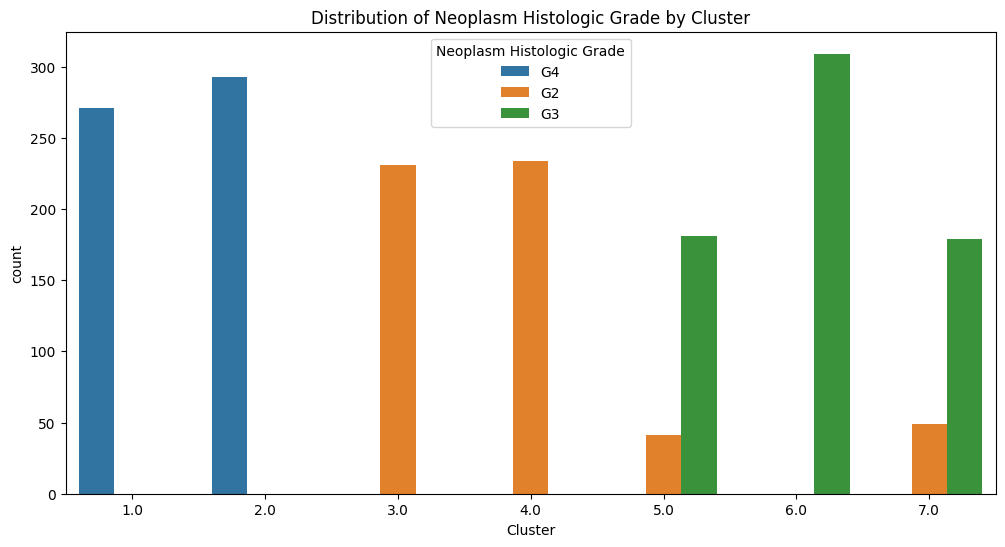

In [ ]:
# Bar plot for the most common Neoplasm Histologic Type Name by cluster
plt.figure(figsize=(12, 6))
sns.countplot(data=merged_before_norm_df_with_clusters, x='Cluster', hue='Neoplasm Histologic Grade')
plt.title('Distribution of Neoplasm Histologic Grade by Cluster')
plt.show()


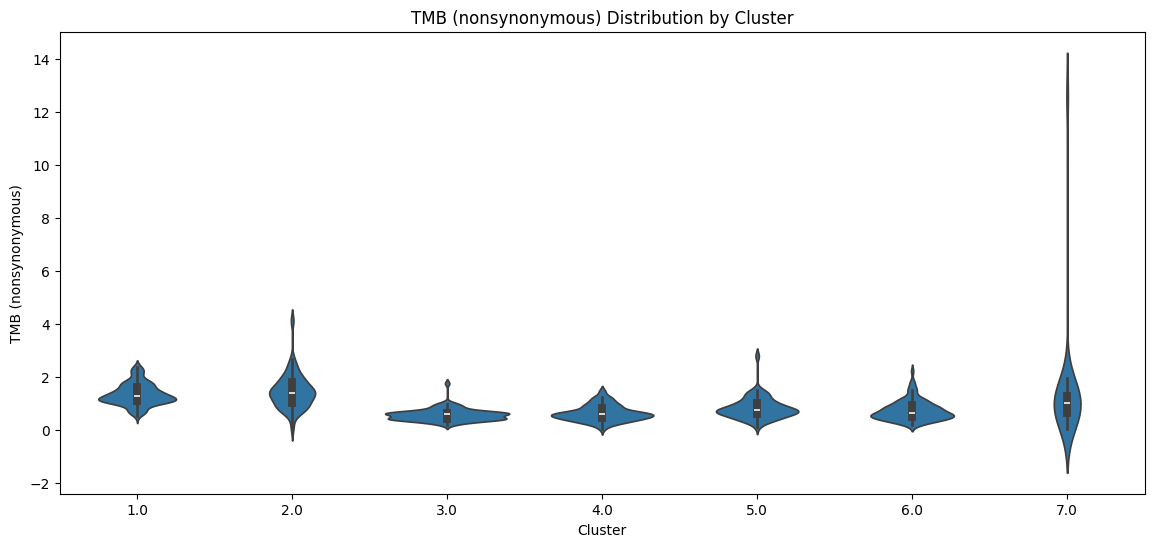

In [ ]:
# Violin plot for TMB (nonsynonymous)
plt.figure(figsize=(14, 6))
sns.violinplot(data=merged_before_norm_df_with_clusters, x='Cluster', y='TMB (nonsynonymous)')
plt.title('TMB (nonsynonymous) Distribution by Cluster')
plt.show()


In [ ]:
# Separate numeric and non-numeric columns
numeric_columns = merged_before_norm_df_with_clusters.select_dtypes(include=[np.number]).columns
non_numeric_columns = merged_before_norm_df_with_clusters.select_dtypes(exclude=[np.number]).columns

# Ensure 'Cluster' is not treated as a numeric column
numeric_columns = [col for col in numeric_columns if col not in ['Cluster']]

# Group by cluster and calculate summary statistics
cluster_profile = merged_before_norm_df_with_clusters.groupby('Cluster').agg({
    **{col: ['mean', 'median'] for col in numeric_columns},  # Mean and median for numeric columns
    **{col: lambda x: x.value_counts().idxmax() for col in non_numeric_columns if col not in ['Cluster', 'Patient ID', 'Sample ID']}  # Most common value for non-numeric columns
})

# Display cluster profiles
print("Cluster Profile Summary:")
print(cluster_profile)


Cluster Profile Summary:
             IDH1             TP53             ATRX             PTEN         \
             mean median      mean median      mean median      mean median   
Cluster                                                                       
1.0      0.003690    0.0  0.158672    0.0  0.011070    0.0  0.151292    0.0   
2.0      0.047782    0.0  0.139932    0.0  0.051195    0.0  0.098976    0.0   
3.0      0.324675    0.0  0.333333    0.0  0.229437    0.0  0.000000    0.0   
4.0      0.341880    0.0  0.106838    0.0  0.098291    0.0  0.008547    0.0   
5.0      0.337838    0.0  0.063063    0.0  0.054054    0.0  0.004505    0.0   
6.0      0.326861    0.0  0.330097    0.0  0.197411    0.0  0.006472    0.0   
7.0      0.061404    0.0  0.153509    0.0  0.109649    0.0  0.074561    0.0   

              TTN         ... Diagnosis Age        TMB (nonsynonymous)  \
             mean median  ...          mean median                mean   
Cluster                   ...       

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure `cluster_profile` columns have a simple structure
cluster_profile.columns = cluster_profile.columns.map('_'.join).str.strip('_')

# Plot heatmap for means of numeric features by cluster
plt.figure(figsize=(16, 10))
sns.heatmap(cluster_profile.filter(like='_mean'), annot=True, cmap='viridis', linewidths=0.5)
plt.title('Heatmap of Numeric Feature Means by Cluster')
plt.xlabel('Features')
plt.ylabel('Cluster')
plt.show()

# Plot heatmap for medians of numeric features by cluster
plt.figure(figsize=(16, 10))
sns.heatmap(cluster_profile.filter(like='_median'), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Numeric Feature Medians by Cluster')
plt.xlabel('Features')
plt.ylabel('Cluster')
plt.show()


ValueError: zero-size array to reduction operation fmin which has no identity

<Figure size 1600x1000 with 0 Axes>

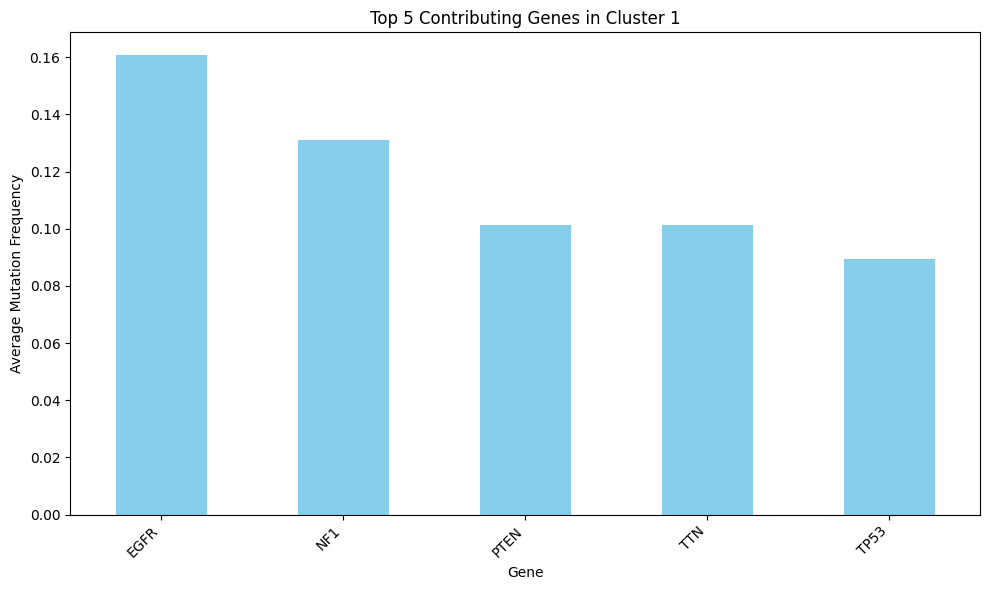

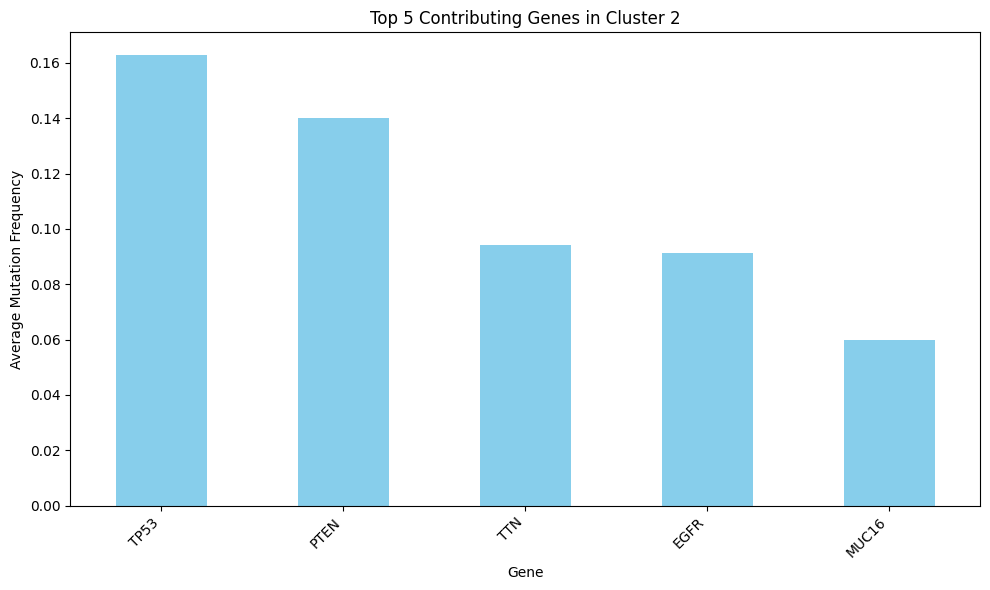

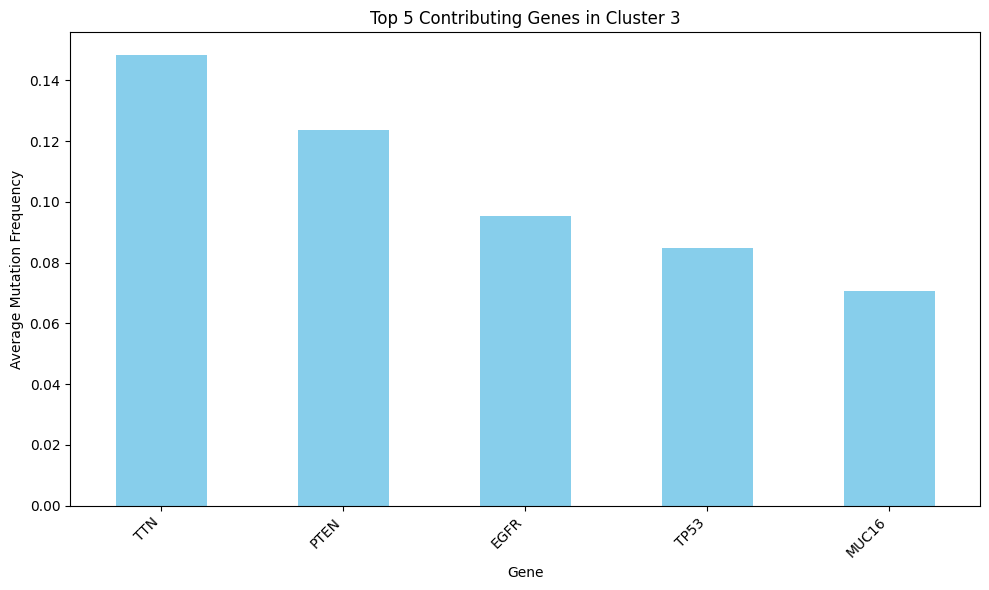

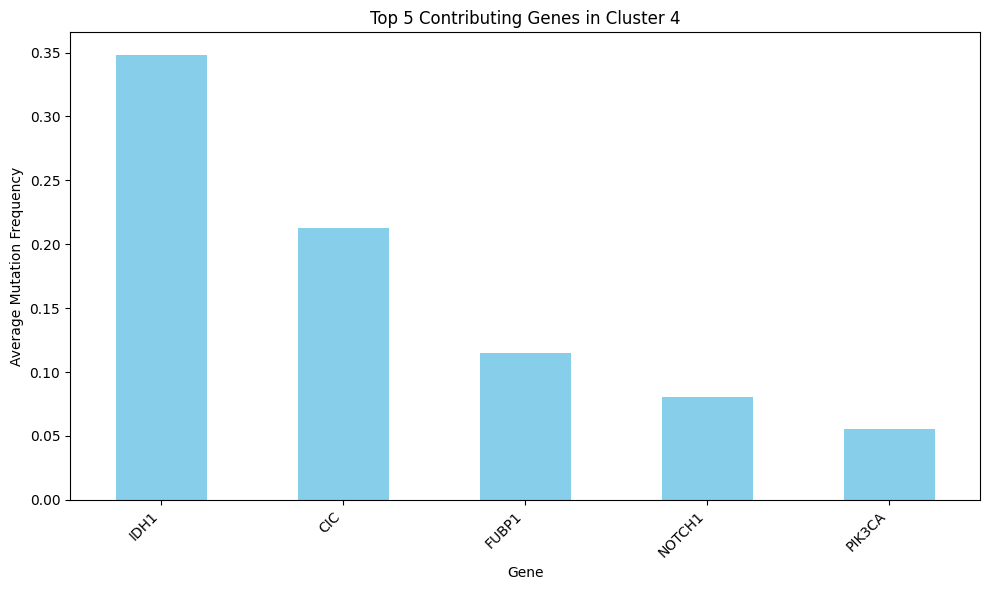

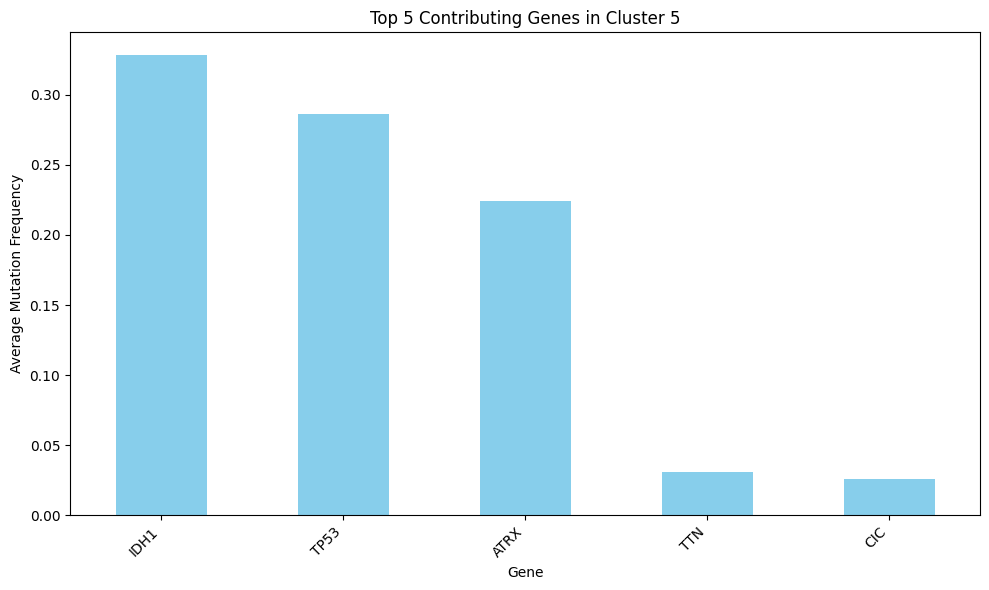

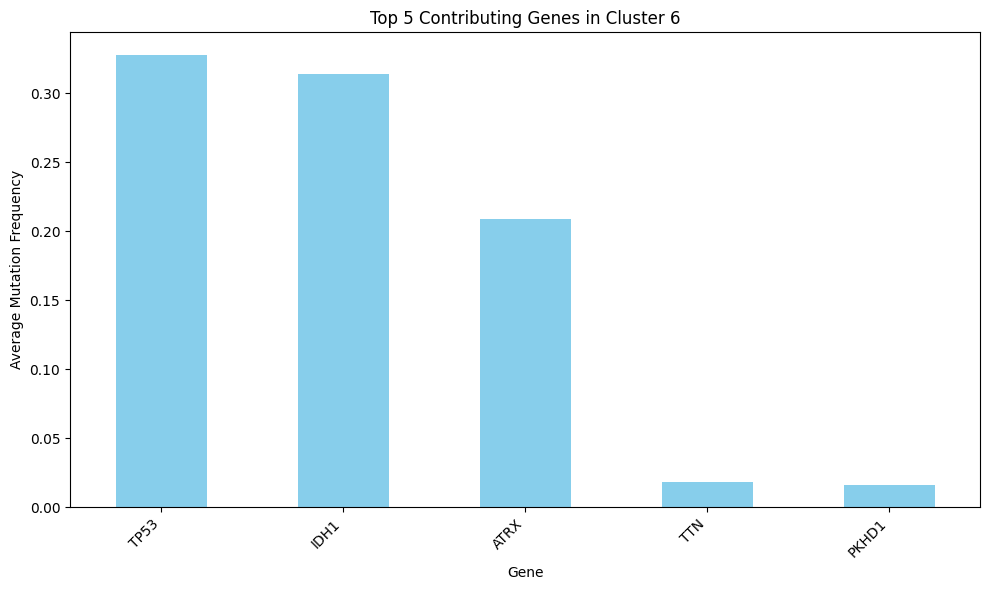

In [ ]:
# Filter top_20_genes to ensure only numeric columns are included
numeric_top_20_genes = [gene for gene in top_20_genes if pd.api.types.is_numeric_dtype(merged_before_norm_df_with_clusters[gene])]

# Calculate gene contribution per cluster by averaging mutation frequency for each numeric gene column
gene_contribution = merged_before_norm_df_with_clusters.groupby('Cluster')[numeric_top_20_genes].mean()

# For each cluster, find the top 5 genes with the highest mutation frequencies
top_genes_per_cluster = {}
for cluster in gene_contribution.index:
    top_genes = gene_contribution.loc[cluster].nlargest(5)
    top_genes_per_cluster[cluster] = top_genes

# Plot the top 5 genes for each cluster
for cluster, top_genes in top_genes_per_cluster.items():
    plt.figure(figsize=(10, 6))
    top_genes.plot(kind='bar', color='skyblue')
    plt.title(f"Top 5 Contributing Genes in Cluster {cluster}")
    plt.xlabel("Gene")
    plt.ylabel("Average Mutation Frequency")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


In [ ]:
clustering_df.columns

Index(['Patient ID', 'IDH1', 'TP53', 'ATRX', 'PTEN', 'TTN', 'EGFR', 'CIC',
       'MUC16', 'PIK3CA', 'NF1', 'RYR2', 'FUBP1', 'PIK3R1', 'FLG', 'PCLO',
       'HMCN1', 'NOTCH1', 'PKHD1', 'LRP2', 'RB1', 'IDH status', 'Sex', 'HM27',
       'Grade_G2', 'Grade_G3', 'Grade_G4', 'Meth_LGm1', 'Meth_LGm2',
       'Meth_LGm3', 'Meth_LGm4', 'Meth_LGm5', 'Meth_LGm6', 'Diagnosis Age',
       'TMB (nonsynonymous)', 'Cluster', 'Cluster K'],
      dtype='object')

In [ ]:
clustering_df

,Patient ID,IDH1,TP53,ATRX,PTEN,TTN,EGFR,CIC,MUC16,PIK3CA,...,Grade_G4,Meth_LGm1,Meth_LGm2,Meth_LGm3,Meth_LGm4,Meth_LGm5,Meth_LGm6,Diagnosis Age,TMB (nonsynonymous),Cluster
0,TCGA-02-0003,0,1,0,0,0,1,0,0,0,...,1,0,0,0,0,1,0,0.480000,0.106101,2
1,TCGA-02-0033,0,1,0,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0.533333,0.053050,2
2,TCGA-02-0047,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,1,0.853333,0.119363,2
3,TCGA-02-0055,0,1,0,1,1,0,0,0,0,...,1,0,0,0,0,1,0,0.640000,0.108753,2
4,TCGA-02-2470,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0.573333,0.111406,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
740,TCGA-P5-A730,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0.106667,0.045093,4
741,TCGA-QH-A65X,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0.186667,0.042440,4
742,TCGA-S9-A6TY,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0.480000,0.031830,4
743,TCGA-S9-A7QY,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0.280000,0.047745,4


In [ ]:
!pip install umap-learn
import pandas as pd
import umap
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler



In [ ]:
import umap
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Step 1: Drop 'Cluster' and 'IDH status' columns and save to a new DataFrame
data_for_umap = clustering_df.drop(columns=['Cluster', 'IDH status'])

# Step 2: Apply UMAP for dimensionality reduction
umap_reducer = umap.UMAP(random_state=42)
umap_embedding = umap_reducer.fit_transform(data_for_umap.drop(columns=['Patient ID']))



/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


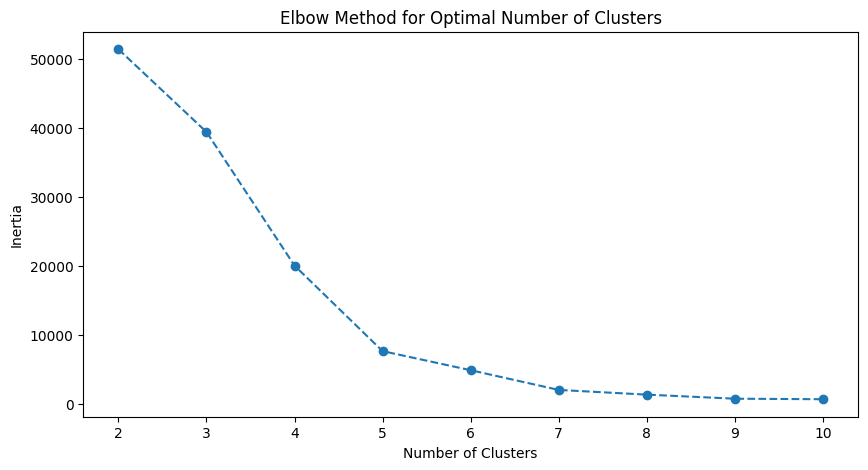

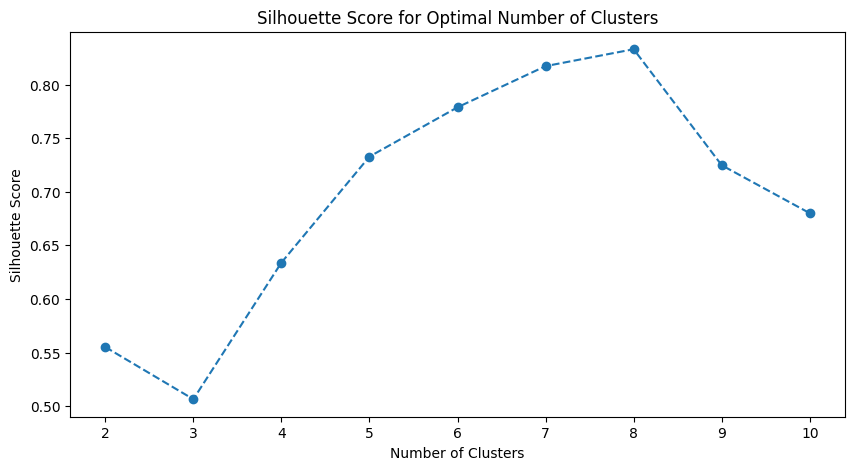

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Elbow Method
inertia_values = []
silhouette_scores = []
range_n_clusters = range(2, 11)  # Try cluster counts from 2 to 10

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans_labels = kmeans.fit_predict(umap_embedding)  # Replace with your UMAP result variable
    inertia_values.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(umap_embedding, kmeans_labels)
    silhouette_scores.append(silhouette_avg)

# Plot Elbow Method
plt.figure(figsize=(10, 5))
plt.plot(range_n_clusters, inertia_values, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

# Plot Silhouette Scores
plt.figure(figsize=(10, 5))
plt.plot(range_n_clusters, silhouette_scores, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal Number of Clusters')
plt.show()


In [ ]:
data_for_umap.columns

Index(['Patient ID', 'IDH1', 'TP53', 'ATRX', 'PTEN', 'TTN', 'EGFR', 'CIC',
       'MUC16', 'PIK3CA', 'NF1', 'RYR2', 'FUBP1', 'PIK3R1', 'FLG', 'PCLO',
       'HMCN1', 'NOTCH1', 'PKHD1', 'LRP2', 'RB1', 'Sex', 'HM27', 'Grade_G2',
       'Grade_G3', 'Grade_G4', 'Meth_LGm1', 'Meth_LGm2', 'Meth_LGm3',
       'Meth_LGm4', 'Meth_LGm5', 'Meth_LGm6', 'Diagnosis Age',
       'TMB (nonsynonymous)', 'Cluster K'],
      dtype='object')

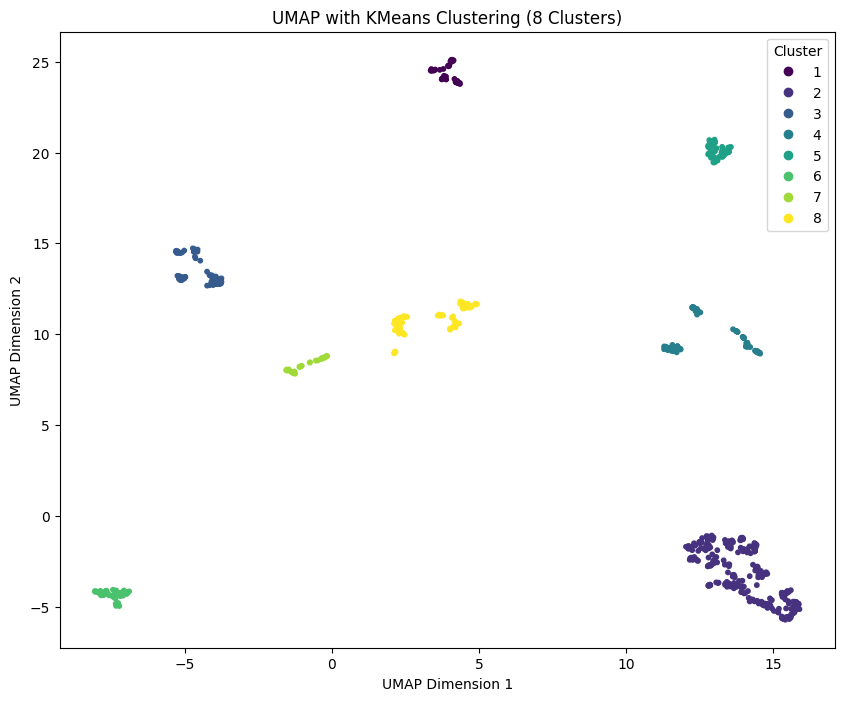

In [ ]:
# Step 3: Apply KMeans clustering on the UMAP-transformed data
n_clusters = 8  # You can adjust this based on your optimal number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(umap_embedding) + 1  # Shift labels to be 1-based for readability

# Step 4: Plot the UMAP embedding with KMeans cluster assignments
plt.figure(figsize=(10, 8))
scatter = plt.scatter(umap_embedding[:, 0], umap_embedding[:, 1], c=kmeans_labels, cmap='viridis', s=10)

# Create a discrete color legend
unique_labels = sorted(set(kmeans_labels))
handles, _ = scatter.legend_elements(prop="colors", num=len(unique_labels))
plt.legend(handles, [str(label) for label in unique_labels], title="Cluster", loc="upper right")
plt.title("UMAP with KMeans Clustering (8 Clusters)")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.show()


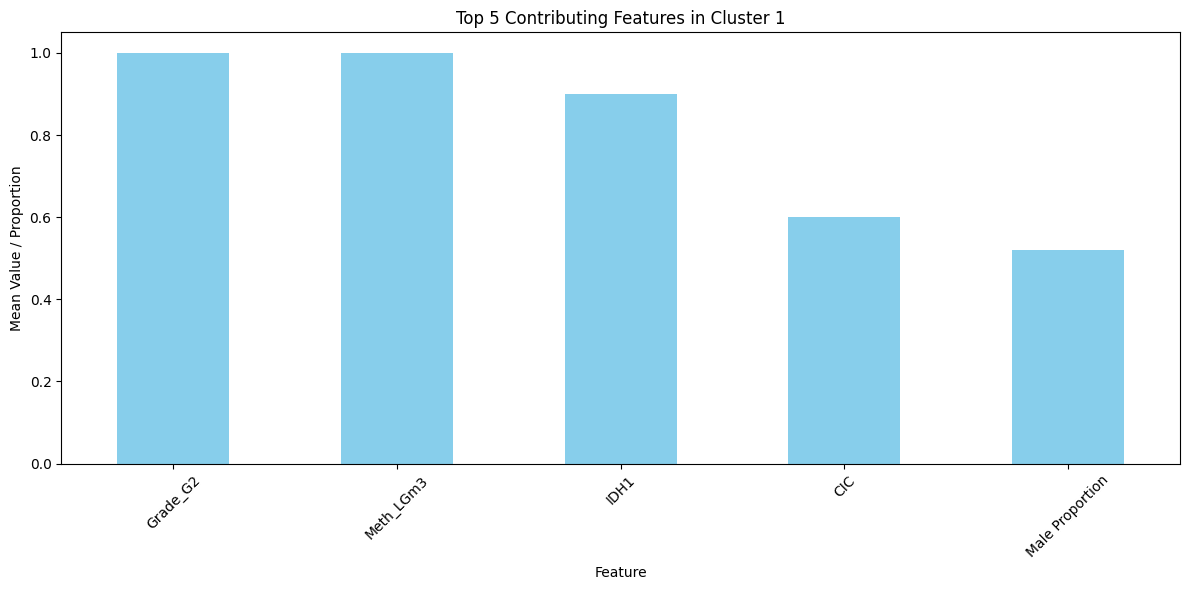

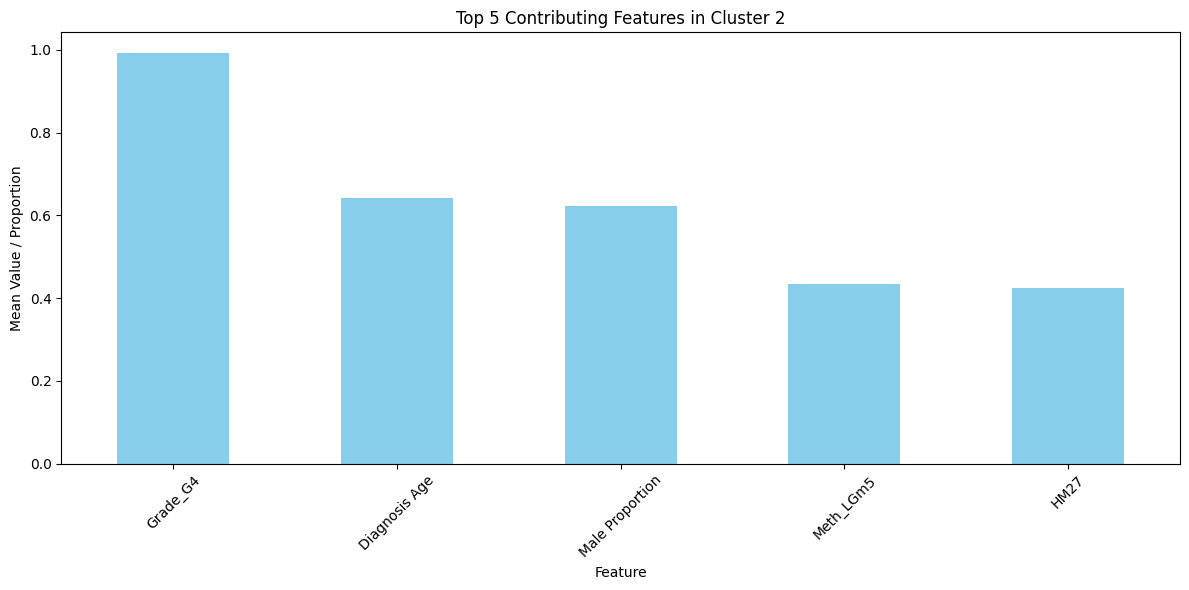

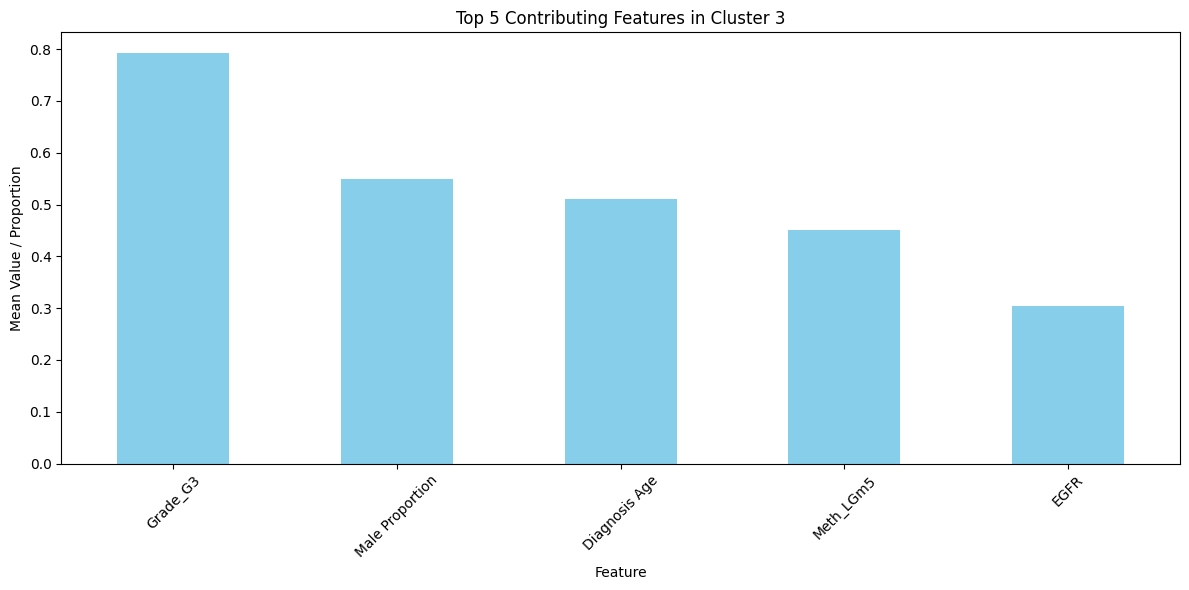

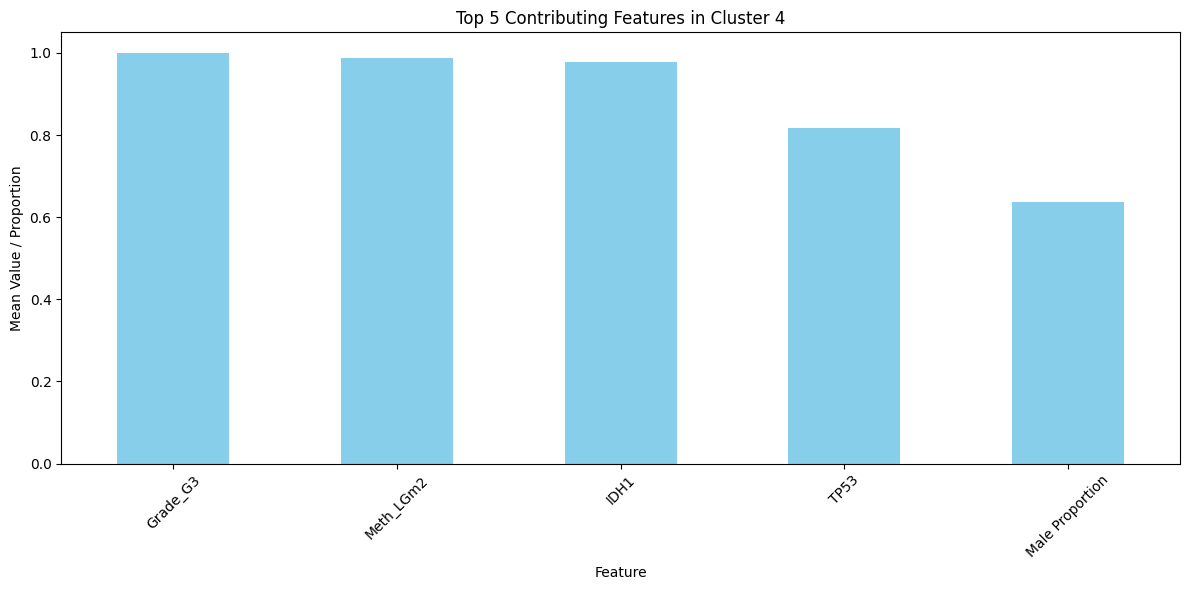

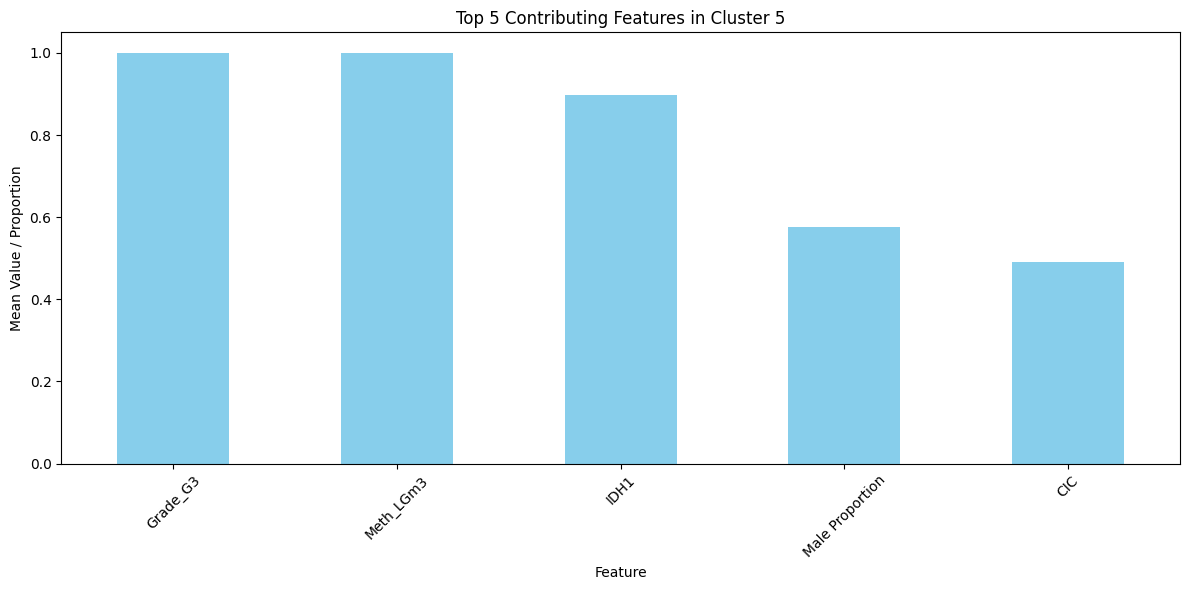

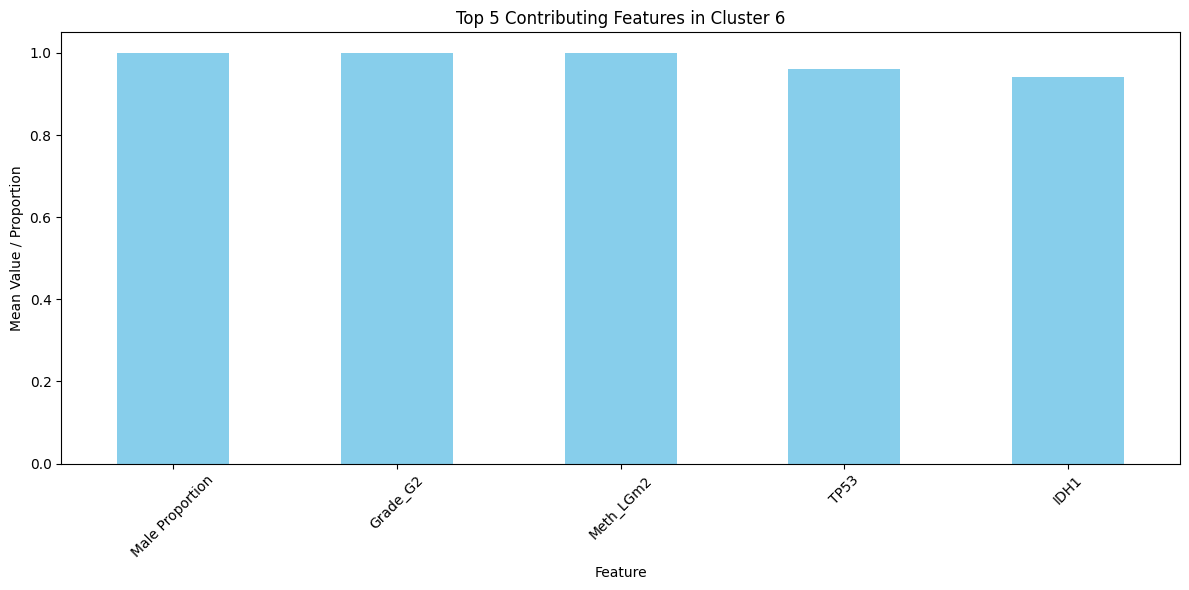

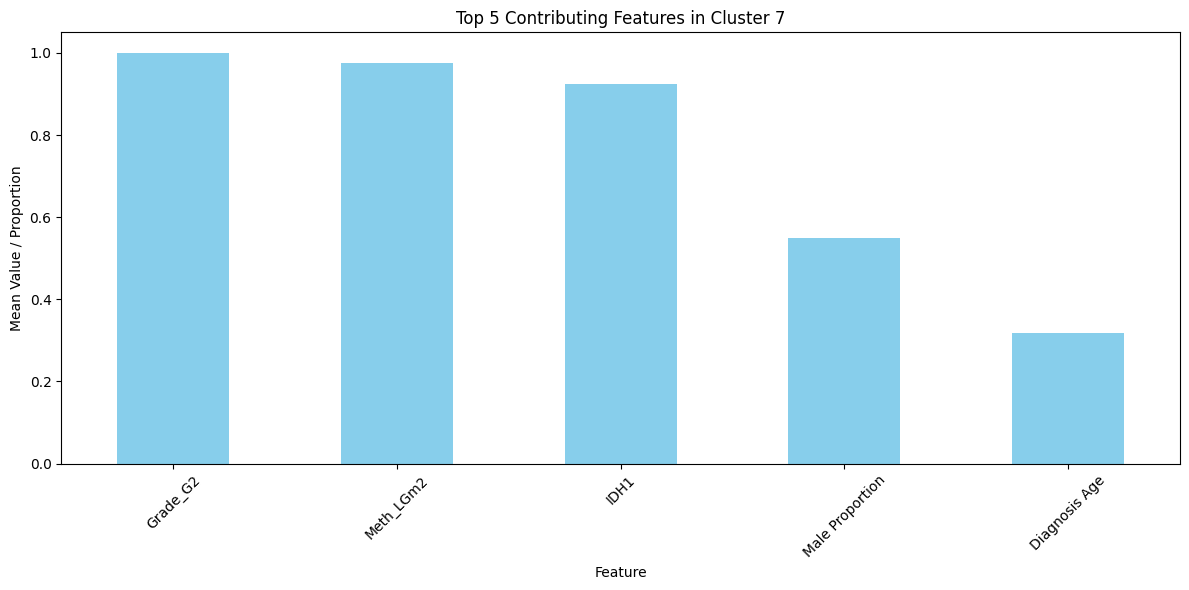

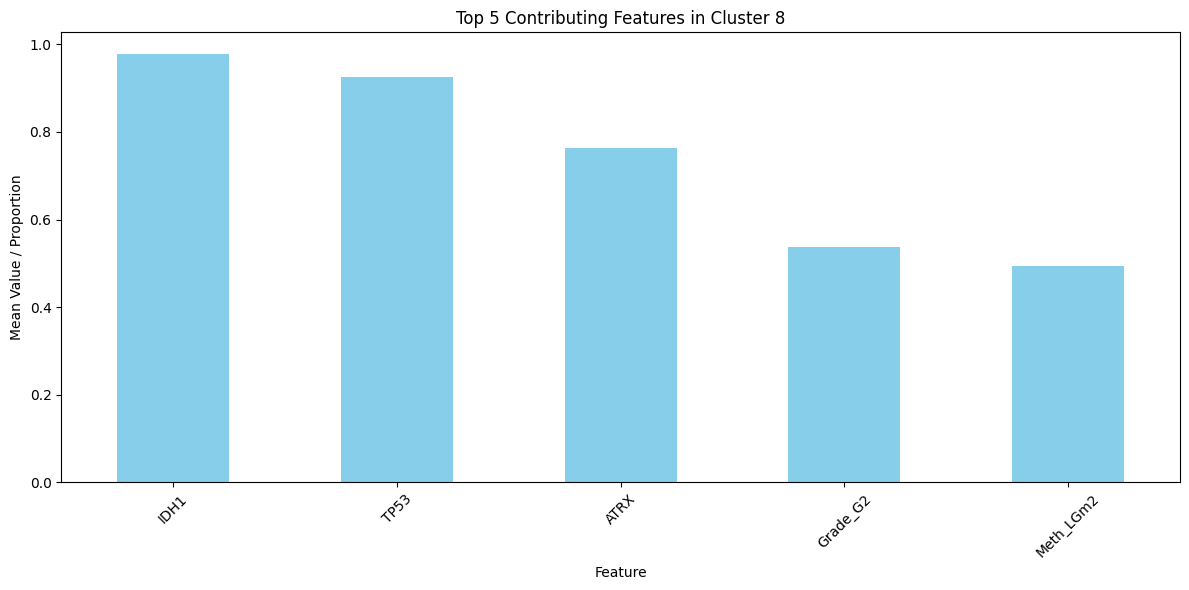

Feature contributions for each cluster:
       IDH1      TP53      ATRX      PTEN       TTN      EGFR       CIC  \
1  0.900000  0.000000  0.020000  0.000000  0.040000  0.000000  0.600000   
2  0.000000  0.231317  0.024911  0.291815  0.217082  0.195730  0.003559   
3  0.000000  0.109756  0.073171  0.219512  0.146341  0.304878  0.000000   
4  0.977273  0.818182  0.590909  0.022727  0.068182  0.000000  0.045455   
5  0.898305  0.067797  0.033898  0.016949  0.084746  0.016949  0.491525   
6  0.942308  0.961538  0.923077  0.000000  0.134615  0.000000  0.000000   
7  0.925000  0.000000  0.000000  0.000000  0.000000  0.000000  0.200000   
8  0.978495  0.924731  0.763441  0.010753  0.075269  0.010753  0.000000   

      MUC16    PIK3CA       NF1  ...  Grade_G3  Grade_G4  Meth_LGm1  \
1  0.000000  0.160000  0.000000  ...  0.000000  0.000000   0.000000   
2  0.135231  0.092527  0.099644  ...  0.000000  0.992883   0.003559   
3  0.060976  0.097561  0.207317  ...  0.792683  0.000000   0.024390   


In [ ]:
# Step 1: Calculate feature contribution per cluster (excluding 'Patient ID' and 'Cluster K')
contributing_features = data_for_umap.drop(columns=['Patient ID', 'Cluster K'])

# Step 2: Initialize a dictionary to store feature contributions per cluster
feature_contributions = {}

# Iterate through each cluster and calculate mean contributions for numerical features
for cluster in range(1, 9):  # For 8 clusters
    cluster_data = data_for_umap[data_for_umap['Cluster K'] == cluster]
    feature_means = cluster_data[contributing_features.columns].mean(numeric_only=True)
    feature_contributions[cluster] = feature_means

# Convert to DataFrame for easier plotting
feature_contributions_df = pd.DataFrame(feature_contributions).transpose()

# Step 3: Handle 'Sex' feature separately (proportion of Males)

sex_contributions = data_for_umap.groupby('Cluster K')['Sex'].apply(lambda x: (x == 1).mean())
feature_contributions_df['Sex'] = sex_contributions  # Keep column name as 'Sex'



# Visualize the top contributing features for each cluster
for cluster in range(1, 9):
    plt.figure(figsize=(12, 6))
    top_features = feature_contributions_df.loc[cluster].nlargest(5)
    top_features.index = top_features.index.str.replace('Sex', 'Male Proportion')
    top_features.plot(kind='bar', color='skyblue')
    plt.title(f"Top 5 Contributing Features in Cluster {cluster}")
    plt.xlabel("Feature")
    plt.ylabel("Mean Value / Proportion")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Print feature contribution DataFrame for verification
print("Feature contributions for each cluster:")
print(feature_contributions_df)


Prediction of survival

In [ ]:
print("Columns in the clustering DataFrame:")
print(clustering_df.columns)

Columns in the clustering DataFrame:
Index(['Patient ID', 'IDH1', 'TP53', 'ATRX', 'PTEN', 'TTN', 'EGFR', 'CIC',
       'MUC16', 'PIK3CA', 'NF1', 'RYR2', 'FUBP1', 'PIK3R1', 'FLG', 'PCLO',
       'HMCN1', 'NOTCH1', 'PKHD1', 'LRP2', 'RB1', 'IDH status', 'Sex',
       'Grade_G2', 'Grade_G3', 'Grade_G4', 'Diagnosis Age',
       'TMB (nonsynonymous)', 'Cluster'],
      dtype='object')


In [ ]:
print("Columns in the clinical DataFrame:")
print(clinical_data.columns)

Columns in the clinical DataFrame:
Index(['Patient ID', 'Sample ID', 'Absolute Extract Ploidy', 'Diagnosis Age',
       'ATRX status', 'BCR Status', 'BRAF-KIAA1549 fusion',
       'BRAF V600E status', 'Cancer Type', 'Cancer Type Detailed',
       'Chr 19/20 co-gain', 'Chr 7 gain/Chr 10 loss', 'DAXX status',
       'ESTIMATE combined score', 'ESTIMATE immune score',
       'ESTIMATE stromal score', 'Neoplasm Histologic Grade',
       'Neoplasm Histologic Type Name', 'HM27', 'HM450', 'IDH-1P10Q Subtype',
       'IDH/codel subtype', 'IDH-specific DNA Methylation Cluster',
       'IDH-specific RNA Expression Cluster', 'IDH status', 'Mutation Count',
       'Oncotree Code', 'Original Subtype', 'Overall Survival (Months)',
       'Overall Survival Status', 'Pan-Glioma DNA Methylation Cluster',
       'Pan-Glioma RNA Expression Cluster', 'Percent aneuploidy', 'Sex',
       'Study', 'Telomere length estimate in blood normal (Kb)',
       'Telomere length estimate in tumor (Kb)', 'Telomere Main

In [ ]:
clinical_data

,Patient ID,Sample ID,Absolute Extract Ploidy,Diagnosis Age,ATRX status,BCR Status,BRAF-KIAA1549 fusion,BRAF V600E status,Cancer Type,Cancer Type Detailed,...,Percent aneuploidy,Sex,Study,Telomere length estimate in blood normal (Kb),Telomere length estimate in tumor (Kb),Telomere Maintenance,TERT expression (log2),TERT expression status,TERT promoter status,TMB (nonsynonymous)
0,TCGA-02-0001,TCGA-02-0001-01,3.47,44,NaN,IGC,NaN,NaN,Glioma,Diffuse Glioma,...,0.424900,Female,Glioblastoma multiforme,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,TCGA-02-0003,TCGA-02-0003-01,1.96,50,WT,IGC,NaN,WT,Glioma,Diffuse Glioma,...,0.147988,Male,Glioblastoma multiforme,NaN,NaN,NaN,NaN,NaN,NaN,1.366667
2,TCGA-02-0004,TCGA-02-0004-01,NaN,59,NaN,IGC,NaN,NaN,Glioma,Diffuse Glioma,...,0.117881,Male,Glioblastoma multiforme,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,TCGA-02-0006,TCGA-02-0006-01,1.93,56,NaN,IGC,NaN,NaN,Glioma,Diffuse Glioma,...,0.239055,Female,Glioblastoma multiforme,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,TCGA-02-0007,TCGA-02-0007-01,1.89,40,NaN,IGC,NaN,NaN,Glioma,Diffuse Glioma,...,0.257454,Female,Glioblastoma multiforme,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1042,TCGA-VW-A7QS,TCGA-VW-A7QS-01,1.95,35,WT,NCH,WT,WT,Glioma,Diffuse Glioma,...,0.086236,Female,Brain Lower Grade Glioma,NaN,NaN,NaN,4.754888,Expressed,NaN,0.933333
1043,TCGA-VW-A8FI,TCGA-VW-A8FI-01,NaN,66,WT,NCH,WT,WT,Glioma,Diffuse Glioma,...,0.107533,Male,Brain Lower Grade Glioma,NaN,NaN,NaN,6.643856,Expressed,NaN,1.233333
1044,TCGA-W9-A837,TCGA-W9-A837-01,NaN,47,WT,NCH,WT,WT,Glioma,Diffuse Glioma,...,0.062593,Male,Brain Lower Grade Glioma,NaN,NaN,NaN,3.169925,Expressed,NaN,0.600000
1045,TCGA-WH-A86K,TCGA-WH-A86K-01,NaN,65,WT,NCH,WT,WT,Glioma,Diffuse Glioma,...,0.161448,Male,Brain Lower Grade Glioma,NaN,NaN,NaN,0.000000,Not expressed,NaN,0.933333


In [ ]:
# Create the 'prediction' DataFrame based on clustering_df by dropping the 'Cluster' column
prediction = clustering_df.drop(columns=['Cluster', 'IDH status']).copy()

# Filter clinical_data to include only the 688 Patient IDs present in clustering_df
filtered_clinical_data = clinical_data[clinical_data['Patient ID'].isin(prediction['Patient ID'])]

# Merge 'Overall Survival Status' directly from clinical_data into prediction based on 'Patient ID'
prediction = prediction.merge(
    filtered_clinical_data[['Patient ID', 'Overall Survival Status']],
    on='Patient ID',
    how='left'
)

# Confirm the merge by checking unique values and any missing entries in 'Overall Survival Status'
print("Unique values in 'Overall Survival Status' in prediction:", prediction['Overall Survival Status'].unique())
print("Number of missing values in 'Overall Survival Status':", prediction['Overall Survival Status'].isna().sum())

# Display the final DataFrame to confirm the structure
print(prediction.head())


Unique values in 'Overall Survival Status' in prediction: ['1:DECEASED' '0:LIVING' nan]
Number of missing values in 'Overall Survival Status': 1
     Patient ID  IDH1  TP53  ATRX  PTEN  TTN  EGFR  CIC  MUC16  PIK3CA  ...  \
0  TCGA-02-0003     0     1     0     0    0     1    0      0       0  ...   
1  TCGA-02-0033     0     1     0     0    0     0    0      0       1  ...   
2  TCGA-02-0047     0     0     0     0    0     0    0      0       1  ...   
3  TCGA-02-0055     0     1     0     1    1     0    0      0       0  ...   
4  TCGA-02-2470     0     0     0     1    0     0    0      0       0  ...   

   PKHD1  LRP2  RB1  Sex  Grade_G2  Grade_G3  Grade_G4  Diagnosis Age  \
0      0     0    0    1         0         0         1       0.480000   
1      0     0    1    1         0         0         1       0.533333   
2      0     0    0    1         0         0         1       0.853333   
3      0     0    0    0         0         0         1       0.640000   
4      0     0 

In [ ]:
# Map 'Overall Survival Status' to 0 for 'LIVING' and 1 for 'DECEASED'
prediction['Overall Survival Status'] = prediction['Overall Survival Status'].map({'0:LIVING': 0, '1:DECEASED': 1})

# Verify the transformation and check for any remaining NaN values
print("Unique values in 'Overall Survival Status' after transformation:", prediction['Overall Survival Status'].unique())
print("Number of missing values in 'Overall Survival Status' after transformation:", prediction['Overall Survival Status'].isna().sum())

# Display the final DataFrame to confirm the transformation
print(prediction.head())


Unique values in 'Overall Survival Status' after transformation: [ 1.  0. nan]
Number of missing values in 'Overall Survival Status' after transformation: 1
     Patient ID  IDH1  TP53  ATRX  PTEN  TTN  EGFR  CIC  MUC16  PIK3CA  ...  \
0  TCGA-02-0003     0     1     0     0    0     1    0      0       0  ...   
1  TCGA-02-0033     0     1     0     0    0     0    0      0       1  ...   
2  TCGA-02-0047     0     0     0     0    0     0    0      0       1  ...   
3  TCGA-02-0055     0     1     0     1    1     0    0      0       0  ...   
4  TCGA-02-2470     0     0     0     1    0     0    0      0       0  ...   

   PKHD1  LRP2  RB1  Sex  Grade_G2  Grade_G3  Grade_G4  Diagnosis Age  \
0      0     0    0    1         0         0         1       0.480000   
1      0     0    1    1         0         0         1       0.533333   
2      0     0    0    1         0         0         1       0.853333   
3      0     0    0    0         0         0         1       0.640000   
4  

In [ ]:
# Convert 'Overall Survival Status' to integer type to remove decimals
prediction['Overall Survival Status'] = prediction['Overall Survival Status'].astype('Int64')


In [ ]:
prediction

,Patient ID,IDH1,TP53,ATRX,PTEN,TTN,EGFR,CIC,MUC16,PIK3CA,...,PKHD1,LRP2,RB1,Sex,Grade_G2,Grade_G3,Grade_G4,Diagnosis Age,TMB (nonsynonymous),Overall Survival Status
0,TCGA-02-0003,0,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0.480000,0.106101,1
1,TCGA-02-0033,0,1,0,0,0,0,0,0,1,...,0,0,1,1,0,0,1,0.533333,0.053050,1
2,TCGA-02-0047,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,1,0.853333,0.119363,1
3,TCGA-02-0055,0,1,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0.640000,0.108753,1
4,TCGA-02-2470,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0.573333,0.111406,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
740,TCGA-VW-A7QS,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0.280000,0.071618,0
741,TCGA-VW-A8FI,0,1,0,0,0,0,0,0,1,...,0,0,0,1,0,1,0,0.693333,0.095491,1
742,TCGA-W9-A837,1,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0.440000,0.045093,0
743,TCGA-WH-A86K,1,1,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0.680000,0.071618,0


In [ ]:
# Save the cleaned DataFrame
prediction.to_csv('prediction20.csv', index=False)

Features selection

In [ ]:
# Remove rows where 'Overall Survival Status' is NaN
prediction = prediction.dropna(subset=['Overall Survival Status'])

# Redefine features and target after removing rows with NaN in Overall Survival Status
X = prediction.drop(columns=['Overall Survival Status'])  # Keep Patient ID for traceability
y = prediction['Overall Survival Status']  # Target variable

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.feature_selection import RFE

# Define features (X) and target variable (y) while retaining Patient ID
X = prediction.drop(columns=['Overall Survival Status'])
y = prediction['Overall Survival Status']

# Step 1: Apply each feature selection method

# 1a. Calculate Weight of Evidence (WoE) for each feature
def calculate_woe(feature, target):
    feature_data = pd.crosstab(feature, target, normalize='columns')
    woe = np.log((feature_data[1] + 1e-5) / (feature_data[0] + 1e-5))
    return abs(woe.sum())

woe_importance = [calculate_woe(X[feature], y) for feature in X.drop(columns=['Patient ID']).columns]
woe_threshold = 0.1
woe_selected = [woe >= woe_threshold for woe in woe_importance]

# 1b. RFE with Logistic Regression
rfe_lr = RFE(estimator=LogisticRegression(max_iter=1000))
rfe_lr.fit(X.drop(columns=['Patient ID']), y)

# 1c. Random Forest for feature importance
rf = RandomForestClassifier()
rf.fit(X.drop(columns=['Patient ID']), y)
rf_importances = rf.feature_importances_
rf_selected = rf_importances > 0.01

# 1d. LASSO for feature selection
lasso = Lasso(alpha=0.01)
lasso.fit(X.drop(columns=['Patient ID']), y)
lasso_importances = lasso.coef_
lasso_selected = lasso_importances != 0

# Step 2: Combine selections with voting (at least three methods)
selected_features = pd.DataFrame({
    'Feature': X.columns.drop('Patient ID'),
    'WoE_Importance': woe_selected,
    'RFE_LR': rfe_lr.support_,
    'RF_Importance': rf_selected,
    'LASSO_Importance': lasso_selected
})

# Voting rule: Retain features selected by at least three methods
selected_features['Selected'] = (
    selected_features[['WoE_Importance', 'RFE_LR', 'RF_Importance', 'LASSO_Importance']].sum(axis=1) >= 3
)

# Final list of selected features, including Patient ID for tracking
final_selected_features = ['Patient ID'] + selected_features[selected_features['Selected']]['Feature'].tolist()

# Ensure TP53 is included in the final selected features
if 'TP53' not in final_selected_features:
    final_selected_features.append('TP53')

# Print the final list and count
print("Final selected features:", final_selected_features)
print(f"Number of selected features: {len(final_selected_features) - 1}")  # Exclude 'Patient ID'


Final selected features: ['Patient ID', 'IDH1', 'ATRX', 'TTN', 'EGFR', 'PIK3CA', 'PIK3R1', 'PCLO', 'PKHD1', 'LRP2', 'RB1', 'Grade_G2', 'Grade_G4', 'Diagnosis Age', 'TP53']
Number of selected features: 14


In [ ]:
num_selected_features = len(final_selected_features) - 1  # Subtract 1 for 'Patient ID'
print("Number of selected features (excluding Patient ID):", num_selected_features)

Number of selected features (excluding Patient ID): 14


10-fold cross validation with Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# Define features (X) and target (y)
X = prediction[final_selected_features].drop(columns=['Patient ID'])  # Keep only selected features
y = prediction['Overall Survival Status']

# Initialize the Random Forest model
model = RandomForestClassifier(random_state=42)

# Apply 10-fold cross-validation
cv_scores = cross_val_score(model, X, y, cv=10, scoring='accuracy')

# Display the results
print("Cross-validation scores for each fold:", cv_scores)
print("Mean cross-validation accuracy:", np.mean(cv_scores))
print("Standard deviation of cross-validation accuracy:", np.std(cv_scores))


Cross-validation scores for each fold: [0.41333333 0.42666667 0.76       0.78666667 0.75675676 0.7972973
 0.7972973  0.64864865 0.64864865 0.74324324]
Mean cross-validation accuracy: 0.6778558558558558
Standard deviation of cross-validation accuracy: 0.13870657050728014


10-fold cross validation with SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
import numpy as np

# Define features (X) and target variable (y)
X = prediction[final_selected_features].drop(columns=['Patient ID'])  # Use selected features, excluding Patient ID
y = prediction['Overall Survival Status']

# Initialize the SVM model with probabilistic output enabled
svm_model = SVC(probability=True, random_state=42)

# Perform 10-fold cross-validation on SVM
svm_cv_scores = cross_val_score(svm_model, X, y, cv=10, scoring='accuracy')

# Display cross-validation results
print("SVM cross-validation scores for each fold:", svm_cv_scores)
print("Mean cross-validation accuracy for SVM:", np.mean(svm_cv_scores))
print("Standard deviation of cross-validation accuracy for SVM:", np.std(svm_cv_scores))


SVM cross-validation scores for each fold: [0.45333333 0.42666667 0.88       1.         0.91891892 0.97297297
 0.89189189 0.63513514 0.67567568 0.68918919]
Mean cross-validation accuracy for SVM: 0.7543783783783784
Standard deviation of cross-validation accuracy for SVM: 0.19813220522955755


10-fold cross validation with LR

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import numpy as np

# Define features and target
X = prediction[final_selected_features].drop(columns=['Patient ID'])  # Use selected features, excluding Patient ID
y = prediction['Overall Survival Status']

# Initialize the Logistic Regression model
lr_model = LogisticRegression(random_state=42)

# Perform 10-fold cross-validation on Logistic Regression
lr_cv_scores = cross_val_score(lr_model, X, y, cv=10, scoring='accuracy')

# Display cross-validation results
print("Logistic Regression cross-validation scores for each fold:", lr_cv_scores)
print("Mean cross-validation accuracy for Logistic Regression:", np.mean(lr_cv_scores))
print("Standard deviation of cross-validation accuracy for Logistic Regression:", np.std(lr_cv_scores))


Logistic Regression cross-validation scores for each fold: [0.37333333 0.4        0.90666667 0.98666667 0.89189189 0.95945946
 0.90540541 0.67567568 0.66216216 0.75675676]
Mean cross-validation accuracy for Logistic Regression: 0.7518018018018019
Standard deviation of cross-validation accuracy for Logistic Regression: 0.21126843761222233


10-fold cross-validation with K-Nearest Neighbors (KNN):

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# Define features and target
X = prediction[final_selected_features].drop(columns=['Patient ID'])  # Use selected features, excluding Patient ID
y = prediction['Overall Survival Status']

# Initialize the KNN model with n_neighbors=6
knn_model = KNeighborsClassifier(n_neighbors=6)

# Perform 10-fold cross-validation on KNN
knn_cv_scores = cross_val_score(knn_model, X, y, cv=10, scoring='accuracy')

# Display cross-validation results
print("KNN (n_neighbors=6) cross-validation scores for each fold:", knn_cv_scores)
print("Mean cross-validation accuracy for KNN:", np.mean(knn_cv_scores))
print("Standard deviation of cross-validation accuracy for KNN:", np.std(knn_cv_scores))


KNN (n_neighbors=6) cross-validation scores for each fold: [0.4        0.45333333 0.84       0.8        0.78378378 0.87837838
 0.82432432 0.68918919 0.67567568 0.74324324]
Mean cross-validation accuracy for KNN: 0.7087927927927928
Standard deviation of cross-validation accuracy for KNN: 0.15380017645653676


10-fold cross-validation with AdaBoost:

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# Define features and target
X = prediction[final_selected_features].drop(columns=['Patient ID'])  # Use selected features, excluding Patient ID
y = prediction['Overall Survival Status']

# Initialize the AdaBoost model
ada_model = AdaBoostClassifier(random_state=42)

# Perform 10-fold cross-validation on AdaBoost
ada_cv_scores = cross_val_score(ada_model, X, y, cv=10, scoring='accuracy')

# Display cross-validation results
print("AdaBoost cross-validation scores for each fold:", ada_cv_scores)
print("Mean cross-validation accuracy for AdaBoost:", np.mean(ada_cv_scores))
print("Standard deviation of cross-validation accuracy for AdaBoost:", np.std(ada_cv_scores))


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

AdaBoost cross-validation scores for each fold: [0.4        0.42666667 0.88       0.96       0.86486486 0.90540541
 0.86486486 0.67567568 0.68918919 0.72972973]
Mean cross-validation accuracy for AdaBoost: 0.7396396396396396
Standard deviation of cross-validation accuracy for AdaBoost: 0.1863176674180713


creating and evaluating a soft-voting ensemble with 10-fold cross-validation:

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import numpy as np

# Define features and target
X = prediction[final_selected_features].drop(columns=['Patient ID'])  # Use selected features, excluding Patient ID
y = prediction['Overall Survival Status']

# Initialize individual models
rf_model = RandomForestClassifier(random_state=42)
svm_model = SVC(probability=True, random_state=42)
knn_model = KNeighborsClassifier(n_neighbors=6)
ada_model = AdaBoostClassifier(random_state=42)
lr_model = LogisticRegression(random_state=42)

# Create the soft-voting ensemble
soft_voting_ensemble = VotingClassifier(
    estimators=[
        ('Random Forest', rf_model),
        ('SVM', svm_model),
        ('KNN', knn_model),
        ('AdaBoost', ada_model),
        ('Logistic Regression', lr_model)
    ],
    voting='soft'  # Use soft voting to average probabilities
)

# Perform 10-fold cross-validation on the soft-voting ensemble
ensemble_cv_scores = cross_val_score(soft_voting_ensemble, X, y, cv=10, scoring='accuracy')

# Display cross-validation results
print("Soft Voting Ensemble cross-validation scores for each fold:", ensemble_cv_scores)
print("Mean cross-validation accuracy for Soft Voting Ensemble:", np.mean(ensemble_cv_scores))
print("Standard deviation of cross-validation accuracy for Soft Voting Ensemble:", np.std(ensemble_cv_scores))


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

Soft Voting Ensemble cross-validation scores for each fold: [0.41333333 0.42666667 0.88       0.96       0.87837838 0.94594595
 0.86486486 0.68918919 0.68918919 0.74324324]
Mean cross-validation accuracy for Soft Voting Ensemble: 0.7490810810810811
Standard deviation of cross-validation accuracy for Soft Voting Ensemble: 0.1882529593132701


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


 soft-voting ensemble with the top three models: AdaBoost, SVM, and Logistic Regression.

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import numpy as np

# Define features and target
X = prediction[final_selected_features].drop(columns=['Patient ID'])  # Use selected features, excluding Patient ID
y = prediction['Overall Survival Status']

# Initialize the top three models
ada_model = AdaBoostClassifier(random_state=42)
svm_model = SVC(probability=True, random_state=42)
lr_model = LogisticRegression(random_state=42)

# Create the soft-voting ensemble with the top three models
top3_soft_voting_ensemble = VotingClassifier(
    estimators=[
        ('AdaBoost', ada_model),
        ('SVM', svm_model),
        ('Logistic Regression', lr_model)
    ],
    voting='soft'  # Use soft voting to average probabilities
)

# Perform 10-fold cross-validation on this top-3 soft-voting ensemble
top3_ensemble_cv_scores = cross_val_score(top3_soft_voting_ensemble, X, y, cv=10, scoring='accuracy')

# Display cross-validation results
print("Top-3 Soft Voting Ensemble cross-validation scores for each fold:", top3_ensemble_cv_scores)
print("Mean cross-validation accuracy for Top-3 Soft Voting Ensemble:", np.mean(top3_ensemble_cv_scores))
print("Standard deviation of cross-validation accuracy for Top-3 Soft Voting Ensemble:", np.std(top3_ensemble_cv_scores))


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

Top-3 Soft Voting Ensemble cross-validation scores for each fold: [0.41333333 0.42666667 0.90666667 1.         0.91891892 0.94594595
 0.91891892 0.63513514 0.64864865 0.68918919]
Mean cross-validation accuracy for Top-3 Soft Voting Ensemble: 0.7503423423423424
Standard deviation of cross-validation accuracy for Top-3 Soft Voting Ensemble: 0.20677479675562516


In [ ]:
from sklearn.ensemble import VotingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
import numpy as np

# Define features and target
X = prediction[final_selected_features].drop(columns=['Patient ID'])  # Use selected features, excluding Patient ID
y = prediction['Overall Survival Status']

# Split the data into train and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize the top three models
ada_model = AdaBoostClassifier(random_state=42)
svm_model = SVC(probability=True, random_state=42)
lr_model = LogisticRegression(random_state=42)

# Create the soft-voting ensemble with the top three models
soft_voting_ensemble = VotingClassifier(
    estimators=[
        ('AdaBoost', ada_model),
        ('SVM', svm_model),
        ('Logistic Regression', lr_model)
    ],
    voting='soft'
)

# Train the ensemble on the training set with cross-validation
cv_scores = cross_val_score(soft_voting_ensemble, X_train, y_train, cv=10, scoring='accuracy')
print("Training cross-validation scores for each fold:", cv_scores)
print("Mean cross-validation accuracy:", np.mean(cv_scores))
print("Standard deviation of cross-validation accuracy:", np.std(cv_scores))

# Fit the model on the entire training set
soft_voting_ensemble.fit(X_train, y_train)

# Evaluate on the test set
y_pred = soft_voting_ensemble.predict(X_test)
print("Test Set Accuracy:", accuracy_score(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, soft_voting_ensemble.predict_proba(X_test)[:, 1]))
print("Classification Report:\n", classification_report(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

Training cross-validation scores for each fold: [0.75       0.83333333 0.75       0.88333333 0.8        0.74576271
 0.74576271 0.62711864 0.74576271 0.79661017]
Mean cross-validation accuracy: 0.7677683615819209
Standard deviation of cross-validation accuracy: 0.06433605121326696
Test Set Accuracy: 0.7651006711409396
ROC-AUC Score: 0.7910331384015595
Classification Report:
               precision    recall  f1-score   support

         0.0       0.81      0.83      0.82        95
         1.0       0.69      0.65      0.67        54

    accuracy                           0.77       149
   macro avg       0.75      0.74      0.74       149
weighted avg       0.76      0.77      0.76       149



In [ ]:
# Count the number of samples for each class in the 'Overall Survival Status' column
deceased_count = prediction['Overall Survival Status'].value_counts().get(1, 0)
living_count = prediction['Overall Survival Status'].value_counts().get(0, 0)

print("Number of deceased patients:", deceased_count)
print("Number of living patients:", living_count)


Number of deceased patients: 268
Number of living patients: 476


In [ ]:
from sklearn.ensemble import VotingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
import numpy as np

# Define features and target
X = prediction[final_selected_features].drop(columns=['Patient ID'])  # Use selected features, excluding Patient ID
y = prediction['Overall Survival Status']

# Split the data into train and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize the models with class_weight adjustments
svm_model = SVC(probability=True, class_weight='balanced', random_state=42)
lr_model = LogisticRegression(class_weight='balanced', random_state=42)
ada_model = AdaBoostClassifier(random_state=42)  # AdaBoost does not have class_weight option

# Create the soft-voting ensemble
weighted_soft_voting_ensemble = VotingClassifier(
    estimators=[
        ('AdaBoost', ada_model),
        ('SVM', svm_model),
        ('Logistic Regression', lr_model)
    ],
    voting='soft'
)

# Train the ensemble on the training set with cross-validation
cv_scores = cross_val_score(weighted_soft_voting_ensemble, X_train, y_train, cv=10, scoring='accuracy')
print("Training cross-validation scores for each fold:", cv_scores)
print("Mean cross-validation accuracy:", np.mean(cv_scores))
print("Standard deviation of cross-validation accuracy:", np.std(cv_scores))

# Fit the model on the entire training set
weighted_soft_voting_ensemble.fit(X_train, y_train)

# Evaluate on the test set
y_pred = weighted_soft_voting_ensemble.predict(X_test)
print("Test Set Accuracy:", accuracy_score(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, weighted_soft_voting_ensemble.predict_proba(X_test)[:, 1]))
print("Classification Report:\n", classification_report(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

Training cross-validation scores for each fold: [0.75       0.83333333 0.81666667 0.83333333 0.76666667 0.72881356
 0.76271186 0.61016949 0.76271186 0.79661017]
Mean cross-validation accuracy: 0.7661016949152541
Standard deviation of cross-validation accuracy: 0.06206093181861905


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Test Set Accuracy: 0.7583892617449665
ROC-AUC Score: 0.7984405458089667
Classification Report:
               precision    recall  f1-score   support

         0.0       0.84      0.77      0.80        95
         1.0       0.65      0.74      0.69        54

    accuracy                           0.76       149
   macro avg       0.74      0.75      0.75       149
weighted avg       0.77      0.76      0.76       149



Feature importance

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Define features and target
X = prediction[final_selected_features].drop(columns=['Patient ID'])  # Use selected features, excluding Patient ID
y = prediction['Overall Survival Status']

# Check for missing values in features and target
if X.isnull().any().any():
    print("Missing values found in features.")
if y.isnull().any():
    print("Missing values found in target variable.")

# Initialize the models
ada_model = AdaBoostClassifier(random_state=42)
svm_model = SVC(probability=True, class_weight='balanced', random_state=42)
lr_model = LogisticRegression(class_weight='balanced', random_state=42)

# Fit each model to the data
ada_model.fit(X, y)
svm_model.fit(X, y)
lr_model.fit(X, y)

# Extract feature importances
# AdaBoost provides feature importances directly
ada_importances = ada_model.feature_importances_

# SVM does not provide feature importances but coefficients can be used
# SVC requires access to dual coefficients
svm_coefficients = svm_model.coef_[0] if hasattr(svm_model, 'coef_') else np.zeros(X.shape[1])

# Logistic Regression coefficients
lr_coefficients = lr_model.coef_[0]




/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [ ]:
# Extract feature importances and coefficients
ada_importances = ada_model.feature_importances_
svm_coefficients = svm_model.coef_[0] if hasattr(svm_model, 'coef_') else np.zeros(X.shape[1])
lr_coefficients = lr_model.coef_[0]

# Check lengths before combining into a DataFrame
if (len(final_selected_features) == len(ada_importances) and
    len(final_selected_features) == len(svm_coefficients) and
    len(final_selected_features) == len(lr_coefficients)):

    # Combine the importances into a DataFrame
    importance_df = pd.DataFrame({
        'Feature': final_selected_features,
        'AdaBoost Importance': ada_importances,
        'SVM Coefficient': svm_coefficients,
        'Logistic Regression Coefficient': lr_coefficients
    })

    # Sort by AdaBoost importance
    importance_df = importance_df.sort_values(by='AdaBoost Importance', ascending=False)

    # Plot feature importances
    plt.figure(figsize=(12, 8))
    plt.barh(importance_df['Feature'], importance_df['AdaBoost Importance'], color='skyblue')
    plt.xlabel('AdaBoost Feature Importance')
    plt.title('Feature Importance from Ensemble Models')
    plt.gca().invert_yaxis()  # To display the highest importance at the top
    plt.show()

    # Display the feature importances DataFrame
    print(importance_df)
else:
    print("Lengths do not match; cannot create DataFrame.")


Lengths do not match; cannot create DataFrame.


In [ ]:
# Check lengths of features and importances
print("Length of final_selected_features:", len(final_selected_features))
print("Length of AdaBoost importances:", len(ada_importances))
print("Length of SVM coefficients:", len(svm_coefficients))
print("Length of Logistic Regression coefficients:", len(lr_coefficients))

# Print the feature names to identify discrepancies
print("Features used:", final_selected_features)


Length of final_selected_features: 15
Length of AdaBoost importances: 14
Length of SVM coefficients: 14
Length of Logistic Regression coefficients: 14
Features used: ['Patient ID', 'IDH1', 'ATRX', 'TTN', 'EGFR', 'PIK3CA', 'PIK3R1', 'PCLO', 'PKHD1', 'LRP2', 'RB1', 'Grade_G2', 'Grade_G4', 'Diagnosis Age', 'TP53']


In [ ]:
# Exclude 'Patient ID' for modeling purposes but keep it in the original DataFrame
features_for_model = [feature for feature in final_selected_features if feature != 'Patient ID']


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Length of features_for_model: 14
Length of AdaBoost importances: 14
Length of SVM coefficients: 14
Length of Logistic Regression coefficients: 14


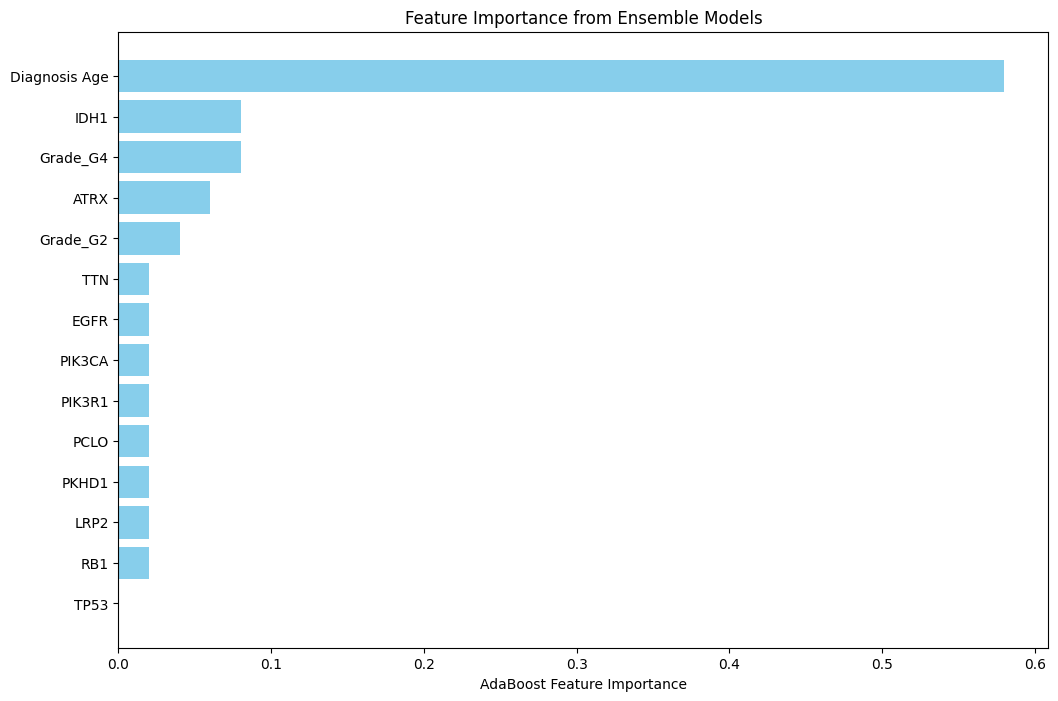

          Feature  AdaBoost Importance  SVM Coefficient  \
12  Diagnosis Age                 0.58              0.0   
0            IDH1                 0.08              0.0   
11       Grade_G4                 0.08              0.0   
1            ATRX                 0.06              0.0   
10       Grade_G2                 0.04              0.0   
2             TTN                 0.02              0.0   
3            EGFR                 0.02              0.0   
4          PIK3CA                 0.02              0.0   
5          PIK3R1                 0.02              0.0   
6            PCLO                 0.02              0.0   
7           PKHD1                 0.02              0.0   
8            LRP2                 0.02              0.0   
9             RB1                 0.02              0.0   
13           TP53                 0.00              0.0   

    Logistic Regression Coefficient  
12                         2.150146  
0                         -1.153517  


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.utils.class_weight import compute_sample_weight

# Define features and target
X = prediction[features_for_model]  # Use selected features, excluding Patient ID
y = prediction['Overall Survival Status']

# Check for missing values in features and target
if X.isnull().any().any():
    print("Missing values found in features.")
if y.isnull().any():
    print("Missing values found in target variable.")

# Apply sample weights for class imbalance
sample_weights = compute_sample_weight('balanced', y)

# Initialize the models with balanced class weights
ada_model = AdaBoostClassifier(random_state=42)
svm_model = SVC(probability=True, class_weight='balanced', random_state=42)
lr_model = LogisticRegression(class_weight='balanced', random_state=42)

# Fit each model to the data with sample weights
ada_model.fit(X, y, sample_weight=sample_weights)
svm_model.fit(X, y, sample_weight=sample_weights)
lr_model.fit(X, y, sample_weight=sample_weights)

# Extract feature importances and coefficients
ada_importances = ada_model.feature_importances_

# For SVM, use coefficients if available
svm_coefficients = svm_model.coef_[0] if hasattr(svm_model, 'coef_') else np.zeros(X.shape[1])

# Logistic Regression coefficients
lr_coefficients = lr_model.coef_[0]

# Ensure lengths match before creating DataFrame
print("Length of features_for_model:", len(features_for_model))
print("Length of AdaBoost importances:", len(ada_importances))
print("Length of SVM coefficients:", len(svm_coefficients))
print("Length of Logistic Regression coefficients:", len(lr_coefficients))

# Combine the importances into a DataFrame if lengths match
if (len(features_for_model) == len(ada_importances) and
    len(features_for_model) == len(svm_coefficients) and
    len(features_for_model) == len(lr_coefficients)):

    importance_df = pd.DataFrame({
        'Feature': features_for_model,
        'AdaBoost Importance': ada_importances,
        'SVM Coefficient': svm_coefficients,
        'Logistic Regression Coefficient': lr_coefficients
    })

    # Sort by AdaBoost importance
    importance_df = importance_df.sort_values(by='AdaBoost Importance', ascending=False)

    # Plot AdaBoost feature importances
    plt.figure(figsize=(12, 8))
    plt.barh(importance_df['Feature'], importance_df['AdaBoost Importance'], color='skyblue')
    plt.xlabel('AdaBoost Feature Importance')
    plt.title('Feature Importance from Ensemble Models')
    plt.gca().invert_yaxis()  # Display highest importance at the top
    plt.show()

    # Display the feature importances DataFrame
    print(importance_df)
else:
    print("Lengths do not match; cannot create DataFrame.")


Diagnosis age is often a strong predictor in survival models, as it's highly correlated with clinical outcomes in gliomas. Removing it can sometimes reveal the predictive power of other features that might otherwise be overshadowed. However, age could provide crucial context, so it might make sense to run models with and without it:

With Age: This version provides a benchmark with a strong predictor.
Without Age: This can allow other features, like gene mutations, to contribute more meaningfully.
Testing both setups may give a clearer picture of each feature's role in survival prediction.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.feature_selection import RFE

# Define features (X) and target variable (y), excluding 'Diagnosis Age'
X = prediction.drop(columns=['Overall Survival Status', 'Diagnosis Age'])
y = prediction['Overall Survival Status']

# Step 1: Apply each feature selection method

# 1a. Calculate Weight of Evidence (WoE) for each feature
def calculate_woe(feature, target):
    feature_data = pd.crosstab(feature, target, normalize='columns')
    woe = np.log((feature_data[1] + 1e-5) / (feature_data[0] + 1e-5))
    return abs(woe.sum())

woe_importance = [calculate_woe(X[feature], y) for feature in X.drop(columns=['Patient ID']).columns]
woe_threshold = 0.1
woe_selected = [woe >= woe_threshold for woe in woe_importance]

# 1b. RFE with Logistic Regression
rfe_lr = RFE(estimator=LogisticRegression(max_iter=1000))
rfe_lr.fit(X.drop(columns=['Patient ID']), y)

# 1c. Random Forest for feature importance
rf = RandomForestClassifier()
rf.fit(X.drop(columns=['Patient ID']), y)
rf_importances = rf.feature_importances_
rf_selected = rf_importances > 0.01

# 1d. LASSO for feature selection
lasso = Lasso(alpha=0.01)
lasso.fit(X.drop(columns=['Patient ID']), y)
lasso_importances = lasso.coef_
lasso_selected = lasso_importances != 0

# Step 2: Combine selections with voting (at least three methods)
selected_features = pd.DataFrame({
    'Feature': X.columns.drop('Patient ID'),
    'WoE_Importance': woe_selected,
    'RFE_LR': rfe_lr.support_,
    'RF_Importance': rf_selected,
    'LASSO_Importance': lasso_selected
})

# Voting rule: Retain features selected by at least three methods
selected_features['Selected'] = (
    selected_features[['WoE_Importance', 'RFE_LR', 'RF_Importance', 'LASSO_Importance']].sum(axis=1) >= 3
)

# Final list of selected features, including Patient ID for tracking
final_selected_features = ['Patient ID'] + selected_features[selected_features['Selected']]['Feature'].tolist()

# Ensure TP53 is included in the final selected features
if 'TP53' not in final_selected_features:
    final_selected_features.append('TP53')

# Print the final list and count
print("Final selected features:", final_selected_features)
print(f"Number of selected features: {len(final_selected_features) - 1}")  # Exclude 'Patient ID'


Final selected features: ['Patient ID', 'IDH1', 'ATRX', 'TTN', 'EGFR', 'PIK3CA', 'FLG', 'PKHD1', 'LRP2', 'RB1', 'Grade_G2', 'Grade_G4', 'TMB (nonsynonymous)', 'TP53']
Number of selected features: 13


10-fold cross-validation with Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# Define features (X) and target (y)
X = prediction[final_selected_features].drop(columns=['Patient ID'])  # Keep only selected features
y = prediction['Overall Survival Status']

# Initialize the Random Forest model
model = RandomForestClassifier(random_state=42)

# Apply 10-fold cross-validation
cv_scores = cross_val_score(model, X, y, cv=10, scoring='accuracy')

# Display the results
print("Cross-validation scores for each fold:", cv_scores)
print("Mean cross-validation accuracy:", np.mean(cv_scores))
print("Standard deviation of cross-validation accuracy:", np.std(cv_scores))


Cross-validation scores for each fold: [0.37333333 0.36       0.76       0.72       0.75675676 0.81081081
 0.77027027 0.64864865 0.66216216 0.71621622]
Mean cross-validation accuracy: 0.6578198198198197
Standard deviation of cross-validation accuracy: 0.15273812233720885
